# Machine Learning Customer Example Requirements

## EXCE-001: Notebook Use Case 

In this notebook we build a Customer Churn Model for Telecommunications Industry


## Background

This notebook is one fully-developed sample use case illustrating an end to end solution to a customer-sourced problem. It includes the processes of: data ingestion, data visualization and cleaning, feature engineering, model selection, model training, parameter tuning and deployment.

## Content

* [Overview](#Overview)
* [Data Source](#Data-Source)
* [Data Exploration](#Data-Exploration)
* [Feature Engineering](#Feature-Engineering)
* [Pre-processing](#Pre-processing)
* [Model Selection](#Model-Selection)
* [Model Deploy](#Model-Deploy)

## <span style="color:lightblue"><a class="anchor" id="Overview"> Overview </a></span>

### Customer Churn

* Customer churn is the number of customers who left the company or stopped purchasing your business's products or services during a certain period of time. 
* In our example the target column indicates whether or not the customer left within the last quarter. The target is defined as Churn Label (or Churn Value): takes the value Yes (or 1) = if the customer left the company this quarter and No (or 0) = if the customer remained with the company.  

### Define Business problem

* **Business problem**: increasing number of subscribers with churn.

* **Business goals**: predict the propensity to churn so that they could design targeted collection/retention campaigns and take timely actions to prevent churn. 

* **Expected benefits**: not only aimed to reduce the number of subscribers leaving their services but also minimize the outstanding debt.


### Machine learning problem formulation

This problem could be addressed using machine learning (ML) techniques. It is a traditional problem of binary classification, where you will try to predict two classes: churn or not. There are plenty of ML options for classification tasks. 

In our case, we decided to fit an XGBoost (Extreme Gradient Boosting) model, which is a popular machine learning algorithm known for its efficiency and effectiveness in handling structured/tabular data. It belongs to the family of gradient boosting algorithms, which are ensemble learning techniques. It is a powerful algorithm that offers high accuracy, scalability, and flexibility, making it a popular choice for churn prediction tasks. Its ability to handle imbalanced data, regularization techniques, and feature importance analysis make it well-suited for identifying and understanding churn behavior in various industries such as telecommunications.


## <span style="color:lightblue"><a class="anchor" id="Data-Source"> Data Source </a></span>

This example case is built on the Telco Customer Churn Open Data Sample provided by [IBM Business Analytics](https://accelerator.ca.analytics.ibm.com/bi/?perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D). 

This sample data module tracks a fictional telco company's customer churn based on a variety of possible factors. The churn column indicates whether or not the customer left within the last month. Other columns include gender, dependents, monthly charges, and many with information about the types of services each customer has. 

Source: IBM. The Telco customer churn data is composed of the following files:
* CustomerChurn.xlsx
* Telco_customer_churn_demographics.xlsx
* Telco_customer_churn_location.xlsx
* Telco_customer_churn_population.xlsx
* Telco_customer_churn_services.xlsx
* Telco_customer_churn_status.xlsx

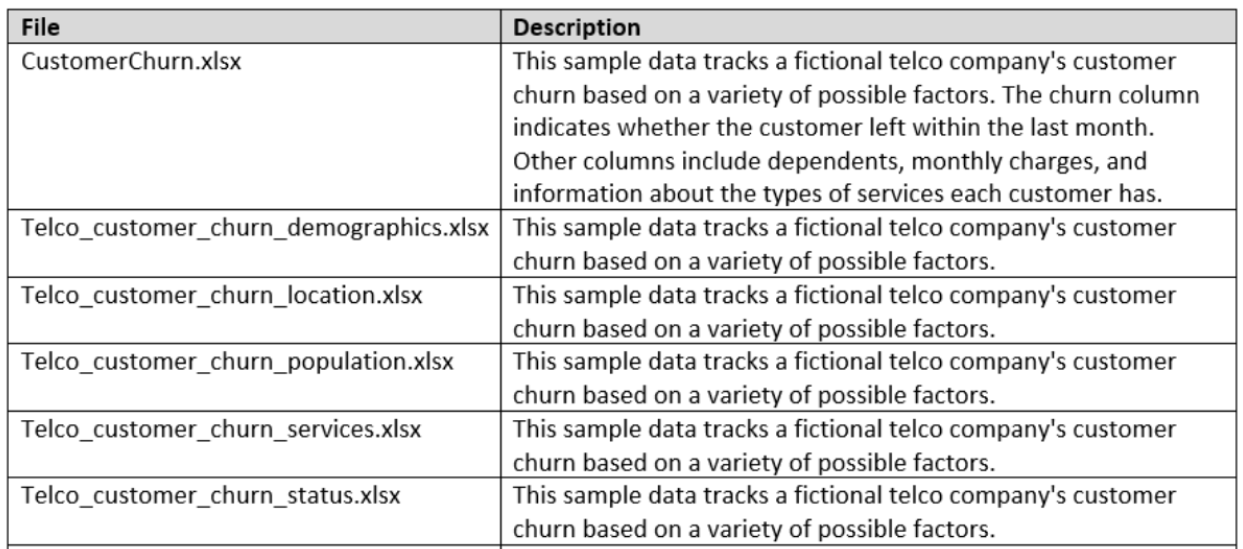

### Feature Dictionary

#### Demographics

* CustomerID: A unique ID that identifies each customer.
* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* Gender: The customer’s gender: Male, Female
* Age: The customer’s current age, in years, at the time the fiscal quarter ended.
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Married: Indicates if the customer is married: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Number of Dependents: Indicates the number of dependents that live with the customer.

#### Location

* CustomerID: A unique ID that identifies each customer.
* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* Country: The country of the customer’s primary residence.
* State: The state of the customer’s primary residence.
* City: The city of the customer’s primary residence.
* Zip Code: The zip code of the customer’s primary residence.
* Lat Long: The combined latitude and longitude of the customer’s primary residence.
* Latitude: The latitude of the customer’s primary residence.
* Longitude: The longitude of the customer’s primary residence.

#### Population

* ID: A unique ID that identifies each row.
* Zip Code: The zip code of the customer’s primary residence.
* Population: A current population estimate for the entire Zip Code area.

#### Services

* CustomerID: A unique ID that identifies each customer.
* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).
* Referred a Friend: Indicates if the customer has ever referred a friend or family member to this company: Yes, No
* Number of Referrals: Indicates the number of referrals to date that the customer has made.
* Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
* Offer: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Avg Monthly Long Distance Charges: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* Avg Monthly GB Download: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Unlimited Data: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* Total Refunds: Indicates the customer’s total refunds, calculated to the end of the quarter specified above.
* Total Extra Data Charges: Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
* Total Long Distance Charges: Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.

#### Status

* CustomerID: A unique ID that identifies each customer.
* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).
* Satisfaction Score: A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
* Satisfaction Score Label: Indicates the text version of the score (1-5) as a text string.
* Customer Status: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
* Churn Score Category: A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100
* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
* CLTV Category: A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.
* Churn Category: A high-level category for the customer’s reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.
* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.
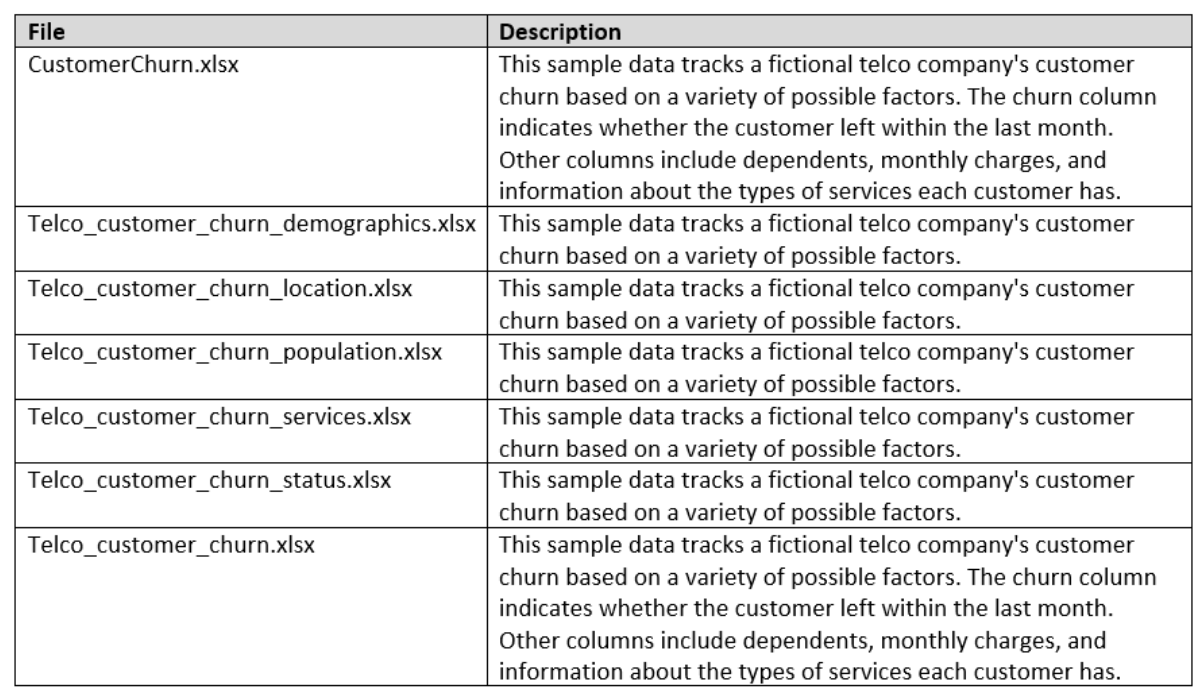

This project will focus on a solution to predict whether a customer will left the company in the next quarter.

## <span style="color:lightblue"><a class="anchor" id="Data-Exploration"> Data Exploration </a></span>

### Set Up Notebook

Required libraries are imported in the following cell. 

In [80]:
# !pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 467.8 kB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import libraries
import sagemaker
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import s3fs
import boto3
import os
from io import StringIO
from utils import summary, draw_histograms, make_corr_plot, draw_boxplots_target, draw_catplots_target
from utils import extract_metric, choose_model, create_confusion_matrix_binary
#from geopy.geocoders import Nominatim
from sagemaker import get_execution_role
from sagemaker.sklearn.processing import SKLearnProcessor
from sagemaker.processing import ProcessingInput, ProcessingOutput
from datetime import datetime 
from time import gmtime, strftime
from sagemaker.debugger import Rule, rule_configs
from sagemaker.inputs import TrainingInput
from IPython.display import FileLink, FileLinks
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


### Parameters 
The following lists configurable parameters that are used throughout the whole notebook.

The data shown here below is available in *"data/input_data"*. You will have to copy them to the desired bucket in S3 under the prefix *'sagemaker/data/'* and then run the following cells.

In [3]:
# introduce your own bucket name
bucket = "ml-ai-competency"

# read available datasets in S3 bucket
client = boto3.client('s3')

response = client.list_objects_v2(
    Bucket=bucket,
    Prefix='sagemaker/data/')

list_files = []
# get list of files in folder
for content in response.get('Contents', []):
    list_files.append(content['Key'])    

In [4]:
list_files

['sagemaker/data/',
 'sagemaker/data/CustomerChurn.xlsx',
 'sagemaker/data/Telco_customer_churn_demographics.xlsx',
 'sagemaker/data/Telco_customer_churn_location.xlsx',
 'sagemaker/data/Telco_customer_churn_population.xlsx',
 'sagemaker/data/Telco_customer_churn_services.xlsx',
 'sagemaker/data/Telco_customer_churn_status.xlsx']

### Collect Data

Load and explore datasets, columns and shape. 

In [7]:
churn_file = [elem for elem in list_files if "CustomerChurn" in elem][0]
print(f"{churn_file}")
customer_churn = pd.read_excel(f"s3://{bucket}/{churn_file}", engine='openpyxl')
customer_churn.info()

sagemaker/data/CustomerChurn.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   obj

In [10]:
customer_churn.shape

(7043, 33)

In [13]:
customer_churn.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
demographics_file = [elem for elem in list_files if "demographics" in elem][0]
print(f"{demographics_file}")
demographics = pd.read_excel(f"s3://{bucket}/{demographics_file}", engine='openpyxl')
demographics.info()

sagemaker/data/Telco_customer_churn_demographics.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [11]:
demographics.shape

(7043, 9)

In [10]:
location_file = [elem for elem in list_files if "location" in elem][0]
print(f"{location_file}")
location = pd.read_excel(f"s3://{bucket}/{location_file}", engine='openpyxl')
location.info()

sagemaker/data/Telco_customer_churn_location.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location ID  7043 non-null   object 
 1   Customer ID  7043 non-null   object 
 2   Count        7043 non-null   int64  
 3   Country      7043 non-null   object 
 4   State        7043 non-null   object 
 5   City         7043 non-null   object 
 6   Zip Code     7043 non-null   int64  
 7   Lat Long     7043 non-null   object 
 8   Latitude     7043 non-null   float64
 9   Longitude    7043 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 550.4+ KB


In [13]:
location.shape

(7043, 10)

In [11]:
population_file = [elem for elem in list_files if "population" in elem][0]
print(f"{population_file}")
population = pd.read_excel(f"s3://{bucket}/{population_file}", engine='openpyxl')
population.info()

sagemaker/data/Telco_customer_churn_population.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          1671 non-null   int64
 1   Zip Code    1671 non-null   int64
 2   Population  1671 non-null   int64
dtypes: int64(3)
memory usage: 39.3 KB


In [15]:
population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [16]:
population.shape

(1671, 3)

In [12]:
services_file = [elem for elem in list_files if "services" in elem][0]
print(f"{services_file}")
services = pd.read_excel(f"s3://{bucket}/{services_file}", engine='openpyxl')
services.info()

sagemaker/data/Telco_customer_churn_services.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count                              7043 non-null   int64  
 3   Quarter                            7043 non-null   object 
 4   Referred a Friend                  7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Intern

In [18]:
services.shape

(7043, 31)

In [13]:
status_file = [elem for elem in list_files if "status" in elem][0]
print(f"{status_file}")
status = pd.read_excel(f"s3://{bucket}/{status_file}", engine='openpyxl')
status.info()

sagemaker/data/Telco_customer_churn_status.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status ID           7043 non-null   object
 1   Customer ID         7043 non-null   object
 2   Count               7043 non-null   int64 
 3   Quarter             7043 non-null   object
 4   Satisfaction Score  7043 non-null   int64 
 5   Customer Status     7043 non-null   object
 6   Churn Label         7043 non-null   object
 7   Churn Value         7043 non-null   int64 
 8   Churn Score         7043 non-null   int64 
 9   CLTV                7043 non-null   int64 
 10  Churn Category      1869 non-null   object
 11  Churn Reason        1869 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB


In [20]:
status.shape

(7043, 12)

In [21]:
status['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [22]:
status['Churn Category'].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

In [23]:
status['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

### Merge Datasets 

Merge datasets according to customer id or zip code, avoiding to duplicate equal columns.

In [24]:
df = customer_churn.merge(demographics[list(set(demographics) - set(customer_churn.columns)) + ['Customer ID']], how='left', on='Customer ID')
df = df.merge(location[list(set(location) - set(df.columns)) + ['Customer ID']], how='left', on='Customer ID')
df = df.merge(population[list(set(population) - set(df.columns)) + ['Zip Code']], how='left', on='Zip Code')
df = df.merge(services[list(set(services) - set(df.columns)) + ['Customer ID']], how='left', on='Customer ID')
df = df.merge(status[list(set(status) - set(df.columns)) + ['Customer ID']], how='left', on='Customer ID')

In [25]:
df.shape

(7043, 64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LoyaltyID                          7043 non-null   int64  
 1   Customer ID                        7043 non-null   object 
 2   Senior Citizen                     7043 non-null   object 
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Tenure                             7043 non-null   int64  
 6   Phone Service                      7043 non-null   object 
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Online Security                    7043 non-null   object 
 10  Online Backup                      7043 non-null   object 
 11  Device Protection                  7043 non-null   objec

Text(0.5, 1.0, 'Tenure in months')

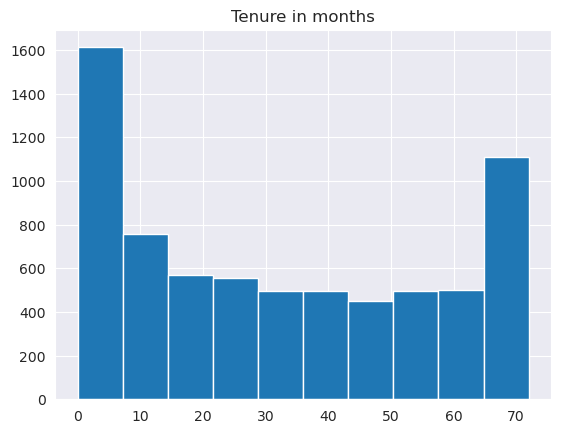

In [27]:
sns.set_style("darkgrid")
df.Tenure.hist(bins=10)
plt.title('Tenure in months')

#### Check for null values

Check for unique values, null values, empty strings or zeros. 

* There are not presence of columns with high percentage of nulls, except for our target variable (or related features). ['Churn Reason', 'Churn Category']
* Some features display a unique value for all registries. ['Count', 'Country', 'State', 'Quarter']
* Some features show high percentage of zeros. ['Number of Dependents', 'Total Refunds', 'Total Extra Data Charges', 'Churn Value']

In [28]:
sum_df = summary(df)

In [29]:
sum_df[0:32]

,variable,dtype,unique,empty,na,%_na,null,%_null,zeros,%_zeros
0,LoyaltyID,int64,7021,0,0,0.0,0,0.0,0,0.0
1,Customer ID,object,7043,0,0,0.0,0,0.0,0,0.0
2,Senior Citizen,object,2,0,0,0.0,0,0.0,0,0.0
3,Partner,object,2,0,0,0.0,0,0.0,0,0.0
4,Dependents,object,2,0,0,0.0,0,0.0,0,0.0
5,Tenure,int64,73,0,0,0.0,0,0.0,11,0.2
6,Phone Service,object,2,0,0,0.0,0,0.0,0,0.0
7,Multiple Lines,object,3,0,0,0.0,0,0.0,0,0.0
8,Internet Service,object,3,0,0,0.0,0,0.0,0,0.0
9,Online Security,object,3,0,0,0.0,0,0.0,0,0.0


In [30]:
sum_df[32:64]

,variable,dtype,unique,empty,na,%_na,null,%_null,zeros,%_zeros
32,Latitude,float64,1626,0,0,0.0,0,0.0,0,0.0
33,State,object,1,0,0,0.0,0,0.0,0,0.0
34,City,object,1106,0,0,0.0,0,0.0,0,0.0
35,ID,int64,1625,0,0,0.0,0,0.0,0,0.0
36,Population,int64,1569,0,0,0.0,0,0.0,0,0.0
37,Avg Monthly GB Download,int64,50,0,0,0.0,0,0.0,1526,21.7
38,Tenure in Months,int64,72,0,0,0.0,0,0.0,0,0.0
39,Total Refunds,float64,500,0,0,0.0,0,0.0,6518,92.5
40,Total Extra Data Charges,int64,16,0,0,0.0,0,0.0,6315,89.7
41,Internet Type,object,4,0,1526,21.7,1526,21.7,0,0.0


In [31]:
list(sum_df[sum_df.unique==1].variable)

['Count', 'Country', 'State', 'Quarter']

In [32]:
for c in list(sum_df[sum_df.unique==1].variable): 
    print(c, df[c].unique()) 

Count [1]
Country ['United States']
State ['California']
Quarter ['Q3']


In [33]:
list(sum_df[sum_df['%_null']>70].variable)

['Churn Reason', 'Churn Category']

In [34]:
list(sum_df[sum_df['%_zeros']>70].variable)

['Number of Dependents',
 'Total Refunds',
 'Total Extra Data Charges',
 'Churn Value']

In [35]:
sum_df.dtype.value_counts()

dtype
object     40
int64      16
float64     8
Name: count, dtype: int64

#### Remove irrelevant columns

Some features have a unique value for all the registries, what means that are not relevant for our purpose. These will be dropped from the data.

In [36]:
columns_to_remove = list(sum_df[sum_df.unique==1].variable)
columns_to_remove

['Count', 'Country', 'State', 'Quarter']

In [37]:
df1 = df.drop(columns=columns_to_remove)

In [38]:
df1.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Premium Tech Support,Satisfaction Score,Churn Score,Churn Reason,Churn Label,Customer Status,Churn Category,Status ID,CLTV,Churn Value
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,3,27,NaN,No,Joined,NaN,GODTMI5747,3964,0
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,No,3,61,NaN,No,Stayed,NaN,JXJTVI9837,3441,0
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,1,86,Competitor made better offer,Yes,Churned,Competitor,SUDNGT6444,3239,1
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,3,66,NaN,No,Stayed,NaN,RJWCXJ6879,4307,0
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,2,67,Moved,Yes,Churned,Other,KZSZDV8891,2701,1


### Feature Exploration

* **Analyzing Categorical columns**

In [39]:
cat_columns = list(set(list(sum_df[sum_df.dtype=='object'].variable)) - set(columns_to_remove))
len(cat_columns)

37

In [40]:
for col in cat_columns[0:15]:
    print("The unique values in column {} are: {}".format(col, df1[col].unique()))

The unique values in column Dependents are: ['No' 'Yes']
The unique values in column Tech Support are: ['No' 'Yes' 'No internet service']
The unique values in column Total Charges are: [29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
The unique values in column Churn Reason are: [nan 'Competitor made better offer' 'Moved'
 'Competitor had better devices' 'Competitor offered more data'
 'Competitor offered higher download speeds' 'Price too high'
 'Service dissatisfaction' 'Attitude of support person'
 'Limited range of services' 'Long distance charges' 'Extra data charges'
 'Product dissatisfaction' 'Network reliability' "Don't know"
 'Lack of affordable download/upload speed'
 'Poor expertise of online support' 'Poor expertise of phone support'
 'Attitude of service provider' 'Deceased'
 'Lack of self-service on Website']
The unique values in column Senior Citizen are: ['No' 'Yes']
The unique values in column Service ID are: ['FRZCGDEGJ1299' 'ZYMHBYTQE1796' 'ZLZTZWPWE3351' ... 'PMJLYZGVQ

In [41]:
for col in cat_columns[15:30]:
    print("The unique values in column {} are: {}".format(col, df1[col].unique()))

The unique values in column Streaming TV are: ['No' 'Yes' 'No internet service']
The unique values in column Payment Method are: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
The unique values in column Customer ID are: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
The unique values in column Premium Tech Support are: ['No' 'Yes']
The unique values in column Lat Long are: ['33.973616, -118.24902' '33.949255, -118.246978' '33.964131, -118.272783'
 ... '32.787836, -117.232373' '32.787836, -117.232374'
 '32.787836, -117.232375']
The unique values in column Device Protection Plan are: ['No' 'Yes']
The unique values in column Churn Label are: ['No' 'Yes']
The unique values in column Churn Category are: [nan 'Competitor' 'Other' 'Price' 'Dissatisfaction' 'Attitude']
The unique values in column Streaming Music are: ['No' 'Yes']
The unique values in column Internet Service are: ['DSL' 'Fiber optic' 'No']
The un

In [42]:
for col in cat_columns[30:40]:
    print("The unique values in column {} are: {}".format(col, df1[col].unique()))

The unique values in column Multiple Lines are: ['No phone service' 'No' 'Yes']
The unique values in column Customer Status are: ['Joined' 'Stayed' 'Churned']
The unique values in column Contract are: ['Month-to-month' 'One year' 'Two year']
The unique values in column Churn are: ['No' 'Yes']
The unique values in column Offer are: ['Offer E' nan 'Offer D' 'Offer C' 'Offer B' 'Offer A']
The unique values in column Streaming Movies are: ['No' 'Yes' 'No internet service']
The unique values in column Under 30 are: ['No' 'Yes']


In [43]:
# convert to proper format 
# total charges is not string => numeric column
df1['Total Charges'] = pd.to_numeric(df1['Total Charges'], errors='coerce')

In [44]:
# remove some columns from analysis
cat_cols = [ x for x in cat_columns if "ID" not in x ] # exclude ID columns 
cat_cols.remove('Total Charges') # remove float column

In [45]:
# analyze high cardinality in features
for col in cat_cols:
    len_categ = len(df1[col].unique())
    if len_categ>10:
        print(col, len_categ)

Churn Reason 21
City 1106
Lat Long 1679


In [46]:
df1['Churn Reason'].unique()

array([nan, 'Competitor made better offer', 'Moved',
       'Competitor had better devices', 'Competitor offered more data',
       'Competitor offered higher download speeds', 'Price too high',
       'Service dissatisfaction', 'Attitude of support person',
       'Limited range of services', 'Long distance charges',
       'Extra data charges', 'Product dissatisfaction',
       'Network reliability', "Don't know",
       'Lack of affordable download/upload speed',
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Deceased', 'Lack of self-service on Website'], dtype=object)

In [47]:
df1.City.value_counts()

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Eldridge              2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Johannesburg          2
Name: count, Length: 1106, dtype: int64

In [48]:
df1['Lat Long'].value_counts()

Lat Long
33.362575, -117.299644    43
33.141265, -116.967221    38
32.825086, -117.199424    34
32.886925, -117.152162    32
33.507255, -117.029473    30
                          ..
32.787836, -117.232374     1
32.787836, -117.232373     1
32.787836, -117.232365     1
32.787836, -117.232366     1
32.787836, -117.232367     1
Name: count, Length: 1679, dtype: int64

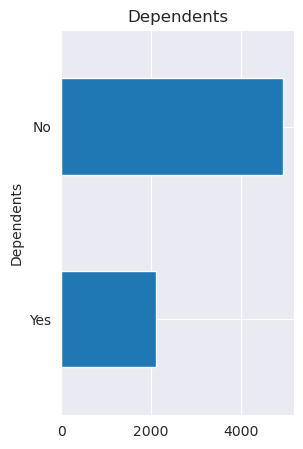

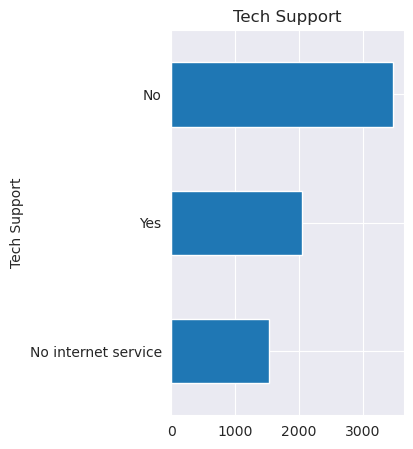

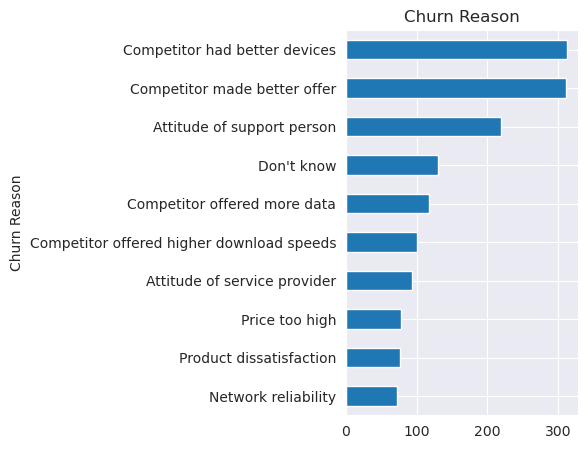

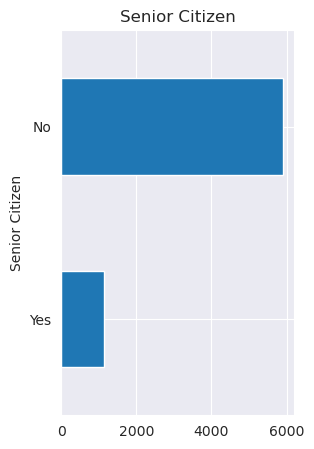

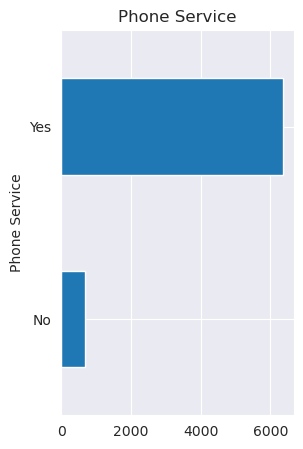

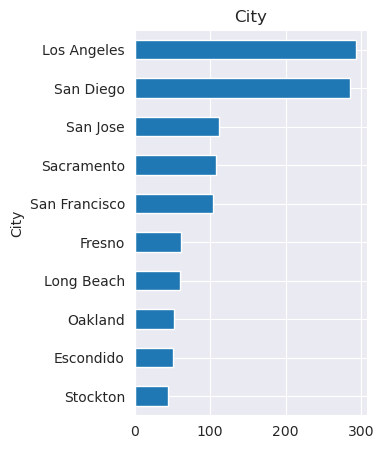

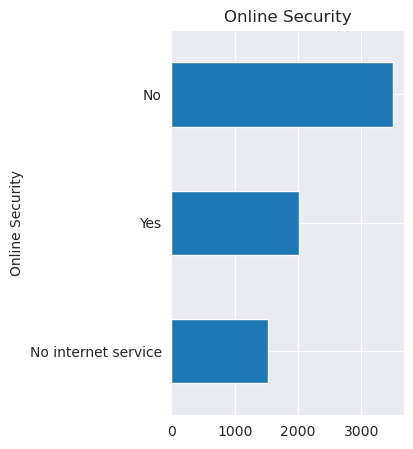

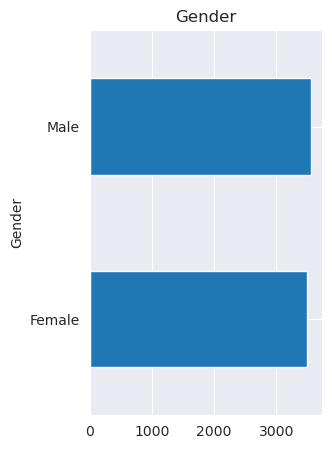

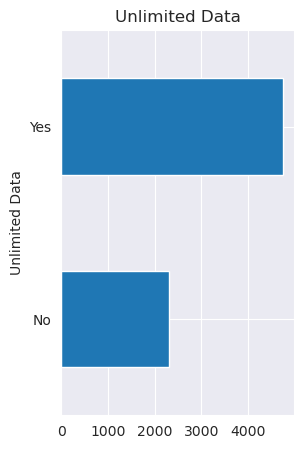

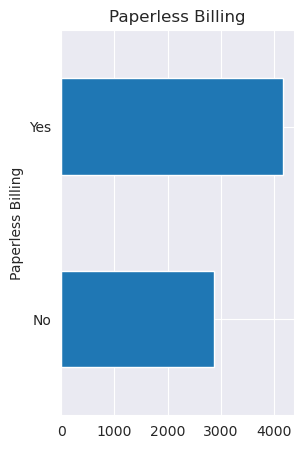

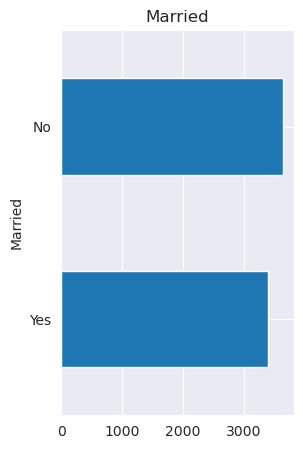

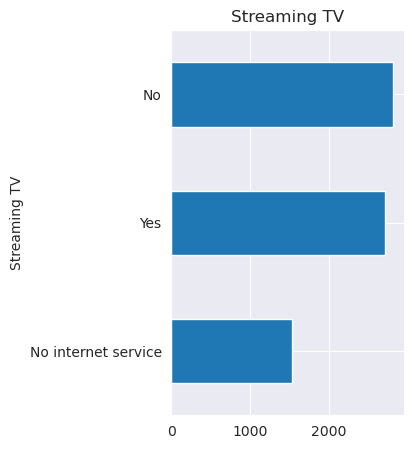

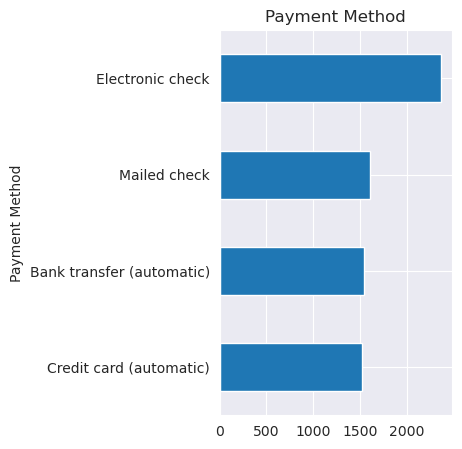

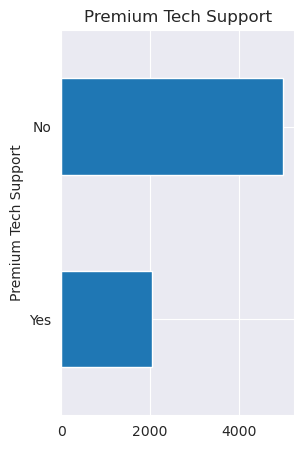

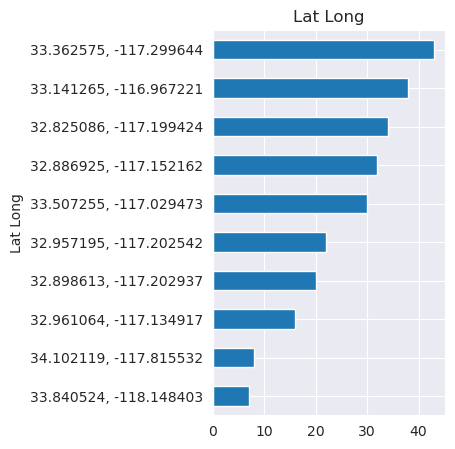

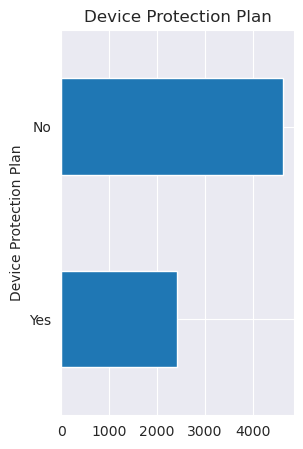

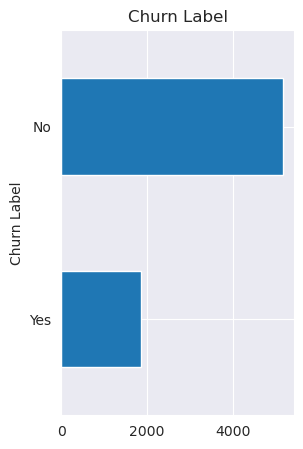

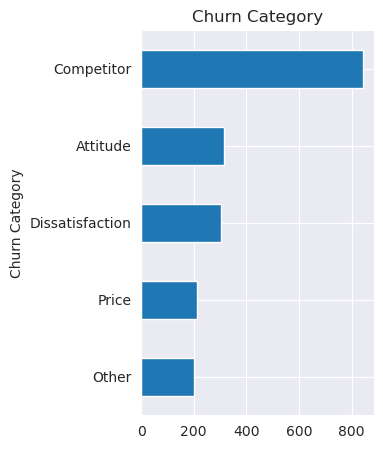

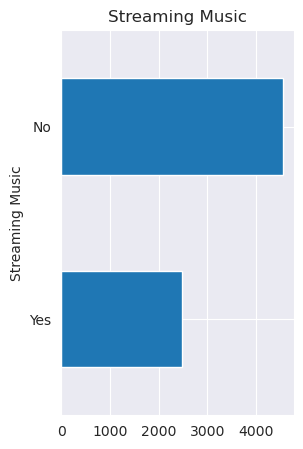

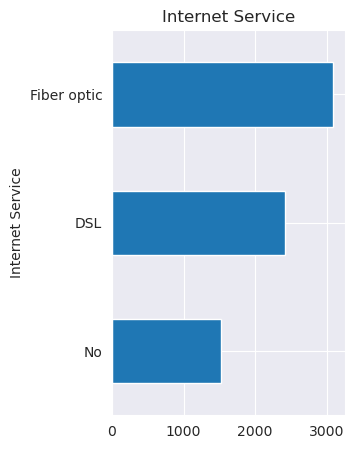

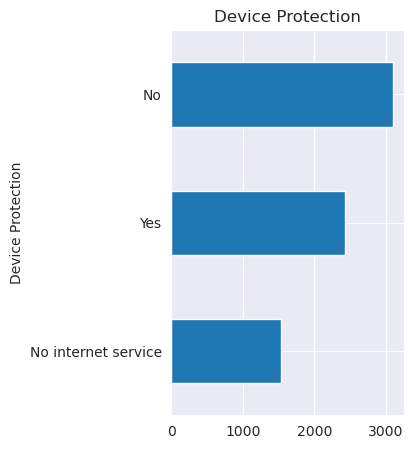

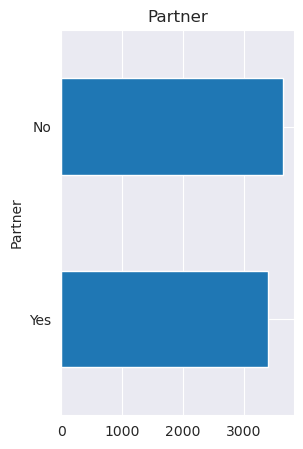

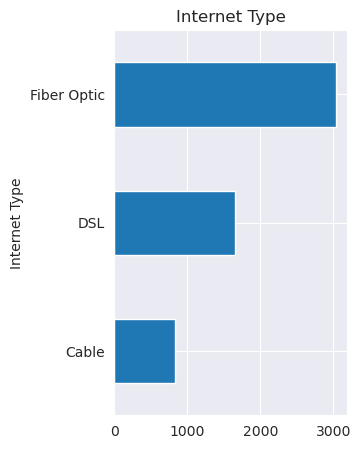

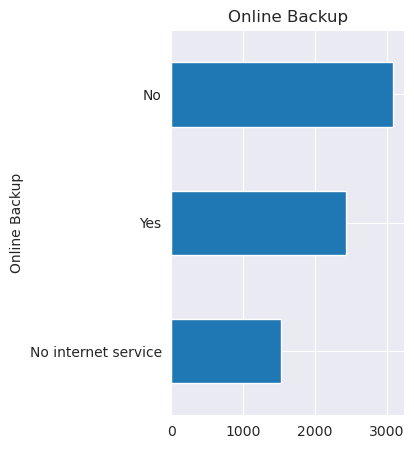

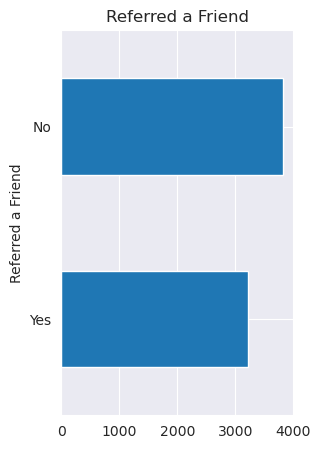

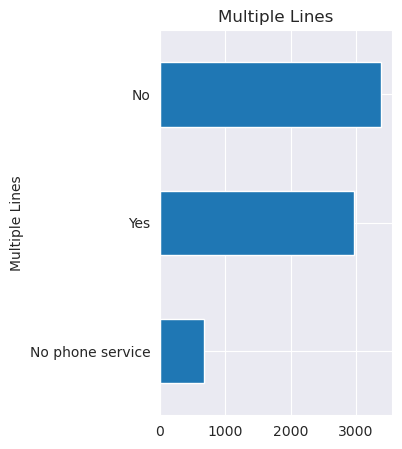

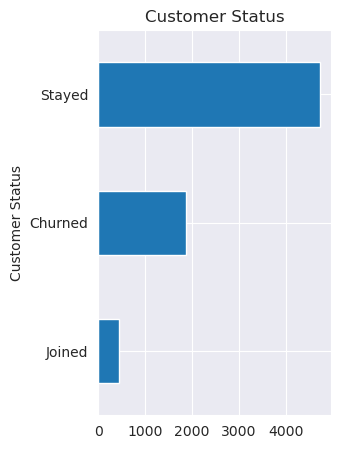

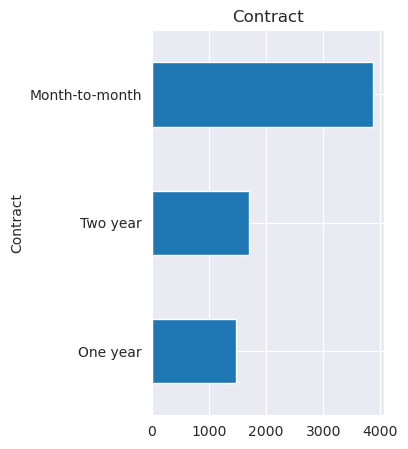

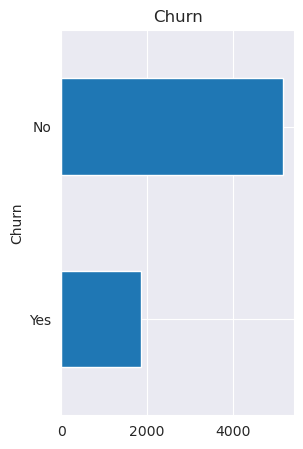

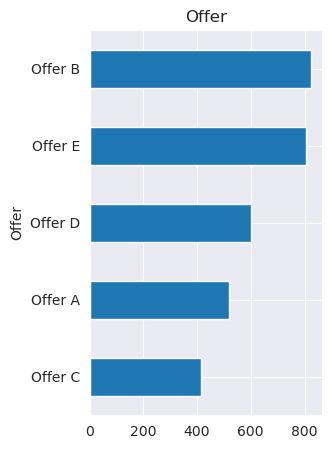

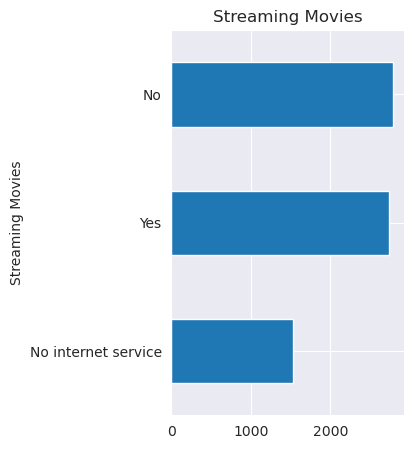

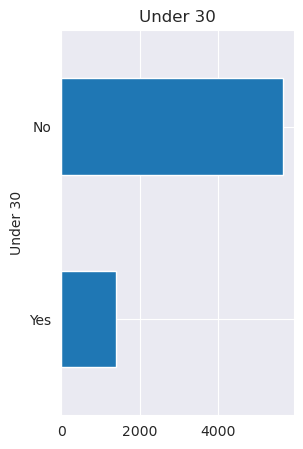

In [49]:
# visualizing top 10 categories of each cat feature
for col in cat_cols:
    # filter df and plot ticker on the new subplot axis
    data = df1[col].value_counts()[:10]
    if 'none' in data.index:
        data.drop('none').plot.barh(figsize=(3,5)).invert_yaxis()
    else: 
        data.plot.barh(figsize=(3,5)).invert_yaxis() 
    # g.set_title(var_name)
    plt.title(col)
    plt.show()

#### Key observations from the above information

* The data available for training corresponds to telecommunications information of users from California, United States in the Q3. 

* There are 7043 unique subscribers from 1106 different Cities (1679 different Lat Long). This information may not be useful as a categorical feature due to its high cardinality. We can try a way of groupping the variables or use instead the latitude and longitude numeric features for the model purpose without losing relevant data. 
* *Churn Reason* might not be helpful as categorical features due to the high cardinality. However, as the *Churn Category* feature is a high-level category for the customer’s reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. We can use this other one instead. 
* The rest of the features show low cardinality and may be usefull to explain the target. We should analyze this further to select the best ones. 

* Initially, we will drop only these 3 features: City, Lat Long and Churn Reason.


* **Analyzing Numerical columns**

In [81]:
num_columns = list(df1.select_dtypes(np.number).columns)
num_columns = [elem for elem in num_columns if 'ID' not in elem]
len(num_columns)

23

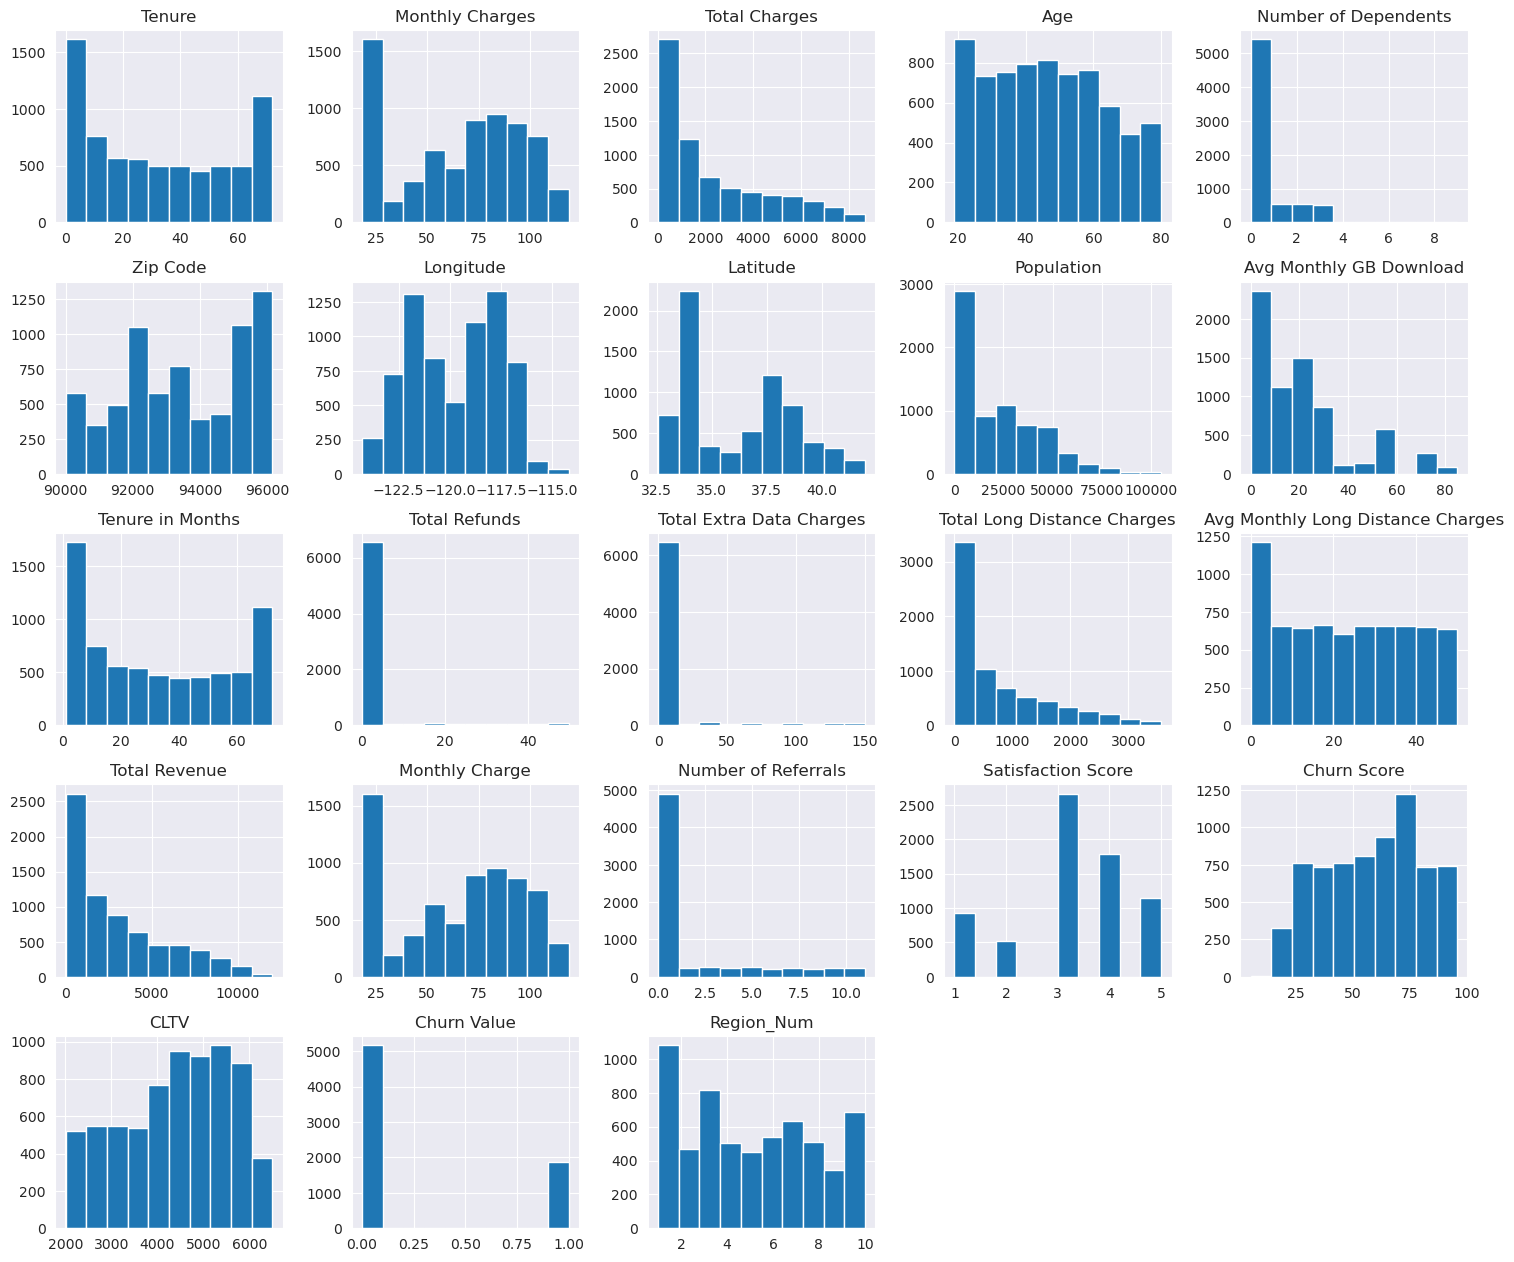

In [82]:
draw_histograms(df1, num_columns)

In [83]:
# Plot the first x and y axes:
df1[ 'Total Charges']/df1['Tenure in Months']

0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Length: 7043, dtype: float64

<AxesSubplot:>

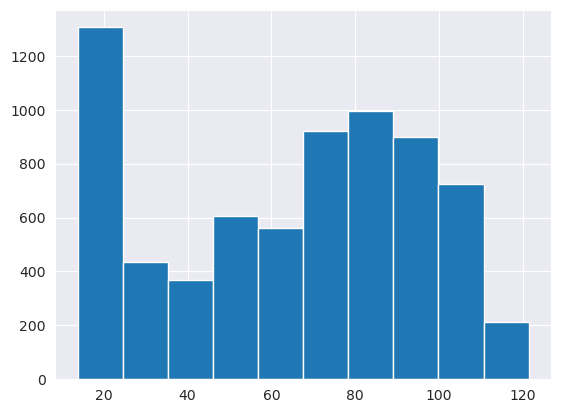

In [84]:
(df1['Total Charges']/df1['Tenure in Months']).hist(bins=10)

In [85]:
df1['Charges_per_tenure'] = df1['Total Charges']/df1['Tenure in Months']

In [86]:
sum(df1.Tenure == df1['Tenure in Months'])

7032

In [87]:
# difference between tenure and tenure in months
df1[df1.Tenure != df1['Tenure in Months']][['Tenure','Tenure in Months']]

,Tenure,Tenure in Months
488,0,10
753,0,10
936,0,10
1082,0,10
1340,0,10
3331,0,10
3826,0,10
4380,0,10
5218,0,10
6670,0,10


In [88]:
# no difference between monthly charge and monthly charges columns
sum(df1['Monthly Charge'] == df1['Monthly Charges'])

7043

### Variable association

The linear association of the variables is studied. Special attention is paid to the correlation of the 'target' variable with the others.

In [89]:
corr = df1[num_columns].corr().stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]

In [90]:
corr['Churn Value'].sort_values()

Satisfaction Score                  -0.754649
Tenure in Months                    -0.352861
Tenure                              -0.352229
Number of Referrals                 -0.286540
Total Long Distance Charges         -0.223756
Total Revenue                       -0.223003
Number of Dependents                -0.218780
Total Charges                       -0.199484
CLTV                                -0.127463
Latitude                            -0.041546
Total Refunds                       -0.033709
Zip Code                            -0.016289
Total Extra Data Charges             0.007139
Avg Monthly Long Distance Charges    0.008120
Longitude                            0.024052
Avg Monthly GB Download              0.048868
Population                           0.051655
Region_Num                           0.055974
Age                                  0.115760
Monthly Charges                      0.193356
Monthly Charge                       0.193356
Churn Score                       

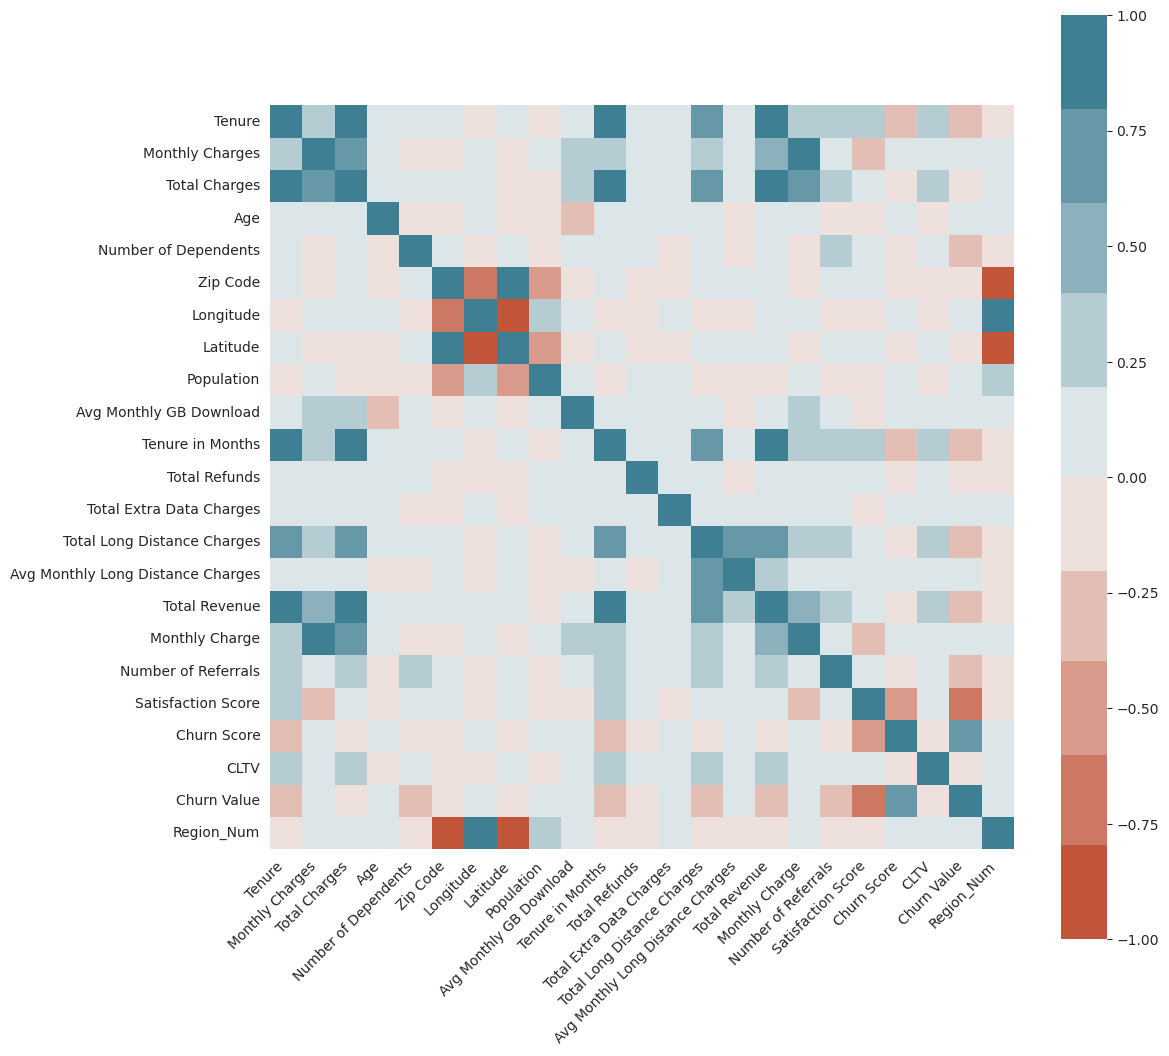

In [91]:
make_corr_plot(df1[num_columns])

* Target variable (Churn Value) has high correlation with satisfaction score (-) and churn score (+). 
* Target displays moderate (-) correlation (-0.25/-0.50) with number of referrals, total long distance Charges, Total Revenue, Number of Dependents and Tenure.   
* Target displays low (+) correlation (0.0/0.25) with Monthly Charges, Age, Longitude, Region_Num, Population, avg monthly long distance charges, avg monthly GB download, total extra data charges. 
* Target displays low (-) correlation (-0.25/0.0) with Total charges, Latitude, Zip Code, Total Refunds and Region_Num. 
* Some features seem to be repeated: 
    - "Tenure" and "Tenure in Months". Only few (11) rows are different (with value 0 for Tenure). We will keep the most complete one that seems to be "Tenure in Months".  
    - 'Monthly Charge' and 'Monthly Charges'. All rows coincide. We will keep only one.
* 2 features of IDs: LoyaltyID and ID. This information may not be useful for model prediction purposes. 

In [92]:
columns_to_remove = ["ID", "LoyaltyID", "Monthly Charge", "Tenure"]
df1 = df1.drop(columns=columns_to_remove)

In [93]:
num_columns = list(set(num_columns) - set(columns_to_remove))

## <span style="color:lightblue"><a class="anchor" id="Feature-Engineering"> Feature Engineering </a></span>

This piece of code could be skipped, and directly load *data/df_latlong.csv* data, which is the result of the preprocessing to create a new feature with the region information. 

**Create New Feature: Region**

Using Nominatim and geolocation data (latitude and longitude), we obtained the location data for each row (address, county, city, country). We extract County data from the previous location field and make some preprocessing to fill null values. We download region data from an external source (https://data.ca.gov/). By extracting the county data and joining it with the region information, we were able to create a new feature that identifies the region by merging both datasets.

In [82]:
df1['Lat Long'][0]

'33.973616, -118.24902'

In [83]:
geolocator.geocode(df1['Lat Long'][0])

Location(1427, East 74th Street, Florence-Firestone, Firestone Park, California, 90001, United States, (33.973406999999995, -118.249019, 0.0))

In [ ]:
# Extract unique values from the 'Lat Long' column in the DataFrame df1
l_lat_long = df1['Lat Long'].unique()

# Initialize Nominatim API with a custom user agent and a timeout of 5 seconds
geolocator = Nominatim(user_agent="FE_dataset_find_location", timeout=5)

# Create an empty list to store location information
list_loc = []

# Iterate through each unique latitude-longitude pair
for latlong in l_lat_long:
    # Use geolocator to retrieve location information based on latitude-longitude
    location = geolocator.geocode(latlong)    
    # Append the location information to the list
    list_loc.append(location)

# Create a DataFrame from the list of latitude-longitude pairs and corresponding locations
df_latlong = pd.DataFrame(list(zip(l_lat_long, list_loc)),
                          columns=['Lat Long', 'Location_geocode'])

In [88]:
# check
df_latlong

,Lat Long,Location_geocode
0,"33.973616, -118.24902","(1427, East 74th Street, Florence-Firestone, F..."
1,"33.949255, -118.246978","(1527, East 96th Street, Watts, Los Angeles, C..."
2,"33.964131, -118.272783","(148, East 82nd Place, Florence, Los Angeles, ..."
3,"34.076259, -118.310715","(Universal Cleaners, 4650, Beverly Boulevard, ..."
4,"34.059281, -118.30742","(722, South Oxford Avenue, Koreatown, Los Ange..."
...,...,...
1674,"32.787836, -117.232371","(Bayside Walk, Crown Point, Pacific Beach, San..."
1675,"32.787836, -117.232372","(Bayside Walk, Crown Point, Pacific Beach, San..."
1676,"32.787836, -117.232373","(Bayside Walk, Crown Point, Pacific Beach, San..."
1677,"32.787836, -117.232374","(Bayside Walk, Crown Point, Pacific Beach, San..."


In [85]:
all_files = glob.glob("./data/*.csv")

In [89]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_latlong = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
# Use glob to find all CSV files in the './data/' directory
csv_files = glob.glob("./data/*.csv")

# Initialize an empty list to store DataFrames
li = []

# Iterate over each file found by glob
for filename in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename, index_col=None, header=0)
    # Append the DataFrame to the list
    li.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_latlong = pd.concat(li, axis=0, ignore_index=True)

# Iterate over each CSV file and delete it
for filename in csv_files:
    os.remove(filename)
    
# Save the concatenated dataframe to csv 
df_latlong.to_csv('df_latlong.csv', index=False)    

In [50]:
# df_latlong = pd.read_csv('df_latlong.csv')

In [51]:
# check
df_latlong[['Lat Long', 'Location_geocode']].head()

,Lat Long,Location_geocode
0,"33.973616, -118.24902","1427, East 74th Street, Florence-Firestone, Fi..."
1,"33.949255, -118.246978","1527, East 96th Street, Watts, Los Angeles, Ca..."
2,"33.964131, -118.272783","148, East 82nd Place, Florence, Los Angeles, C..."
3,"34.076259, -118.310715","Universal Cleaners, 4650, Beverly Boulevard, W..."
4,"34.059281, -118.30742","722, South Oxford Avenue, Koreatown, Los Angel..."


In [52]:
df_latlong[['Lat Long', 'Location_geocode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Lat Long          1679 non-null   object
 1   Location_geocode  1679 non-null   object
dtypes: object(2)
memory usage: 26.4+ KB


In [53]:
df_latlong.loc[0, 'Location_geocode']

'1427, East 74th Street, Florence-Firestone, Firestone Park, California, 90001, United States'

In [ ]:
# create empty list
list_county = []
# iterate through DataFrame Rows
for i in range(len(df_latlong)):
    # Extract Expressions containing 'County'
    expressions = [expression.strip() for expression in str(df_latlong.loc[i, 'Location_geocode']).split(", ") if 'County' in expression]
    # Conditional Appending to list_county
    if len(expressions) == 1: # only one expression containing 'County' was found
        list_county.append(expressions[0])
    elif len(expressions) == 2: # two expressions containing 'County' were found
        list_county.append(expressions[1])
    else: 
        list_county.append(np.NaN)

In [132]:
#check
list_county

In [57]:
len(list_county)

1679

In [58]:
df_latlong['County'] = list_county

In [59]:
df_latlong['County'].value_counts()

County
San Diego County          148
Orange County              84
San Bernardino County      75
Riverside County           70
Santa Clara County         56
Sacramento County          49
Fresno County              48
Alameda County             46
Kern County                41
Sonoma County              35
Tulare County              34
Contra Costa County        34
Humboldt County            33
Placer County              31
San Mateo County           28
Monterey County            27
Marin County               27
San Joaquin County         26
Shasta County              26
Mendocino County           25
Ventura County             24
Santa Barbara County       23
Stanislaus County          23
El Dorado County           20
Siskiyou County            20
San Luis Obispo County     19
Merced County              18
Calaveras County           18
Butte County               17
Santa Cruz County          16
Lassen County              15
Imperial County            14
Tehama County              14
Yol

In [60]:
df_latlong.head()

,Unnamed: 0,Lat Long,Location_geocode,County
0,0,"33.973616, -118.24902","1427, East 74th Street, Florence-Firestone, Fi...",NaN
1,1,"33.949255, -118.246978","1527, East 96th Street, Watts, Los Angeles, Ca...",NaN
2,2,"33.964131, -118.272783","148, East 82nd Place, Florence, Los Angeles, C...",NaN
3,3,"34.076259, -118.310715","Universal Cleaners, 4650, Beverly Boulevard, W...",NaN
4,4,"34.059281, -118.30742","722, South Oxford Avenue, Koreatown, Los Angel...",NaN


In [ ]:
# Correct NaN data with LA data in cases which apply
# Initialize an empty list to store occurrences of 'Los Angeles' in the 'Location_geocode' column
list_la = []
# Loop through each row in the DataFrame
for i in range(len(df_latlong)):
    # Split the 'Location_geocode' value into expressions and check for occurrences of 'Los Angeles'
    la = ['Los Angeles' for expression in str(df_latlong.loc[i, 'Location_geocode']).split(", ") if 'Los Angeles' in expression]
    # Append the list of occurrences (or an empty list if none) to 'list_la'
    list_la.append(la)

# Initialize an empty list to store cleaned elements from 'list_la'
list_la_ = []
# Loop through each element in 'list_la'
for elem in list_la:
    # Check if there is at least one occurrence of 'Los Angeles'
    if len(elem) >= 1:
        # If so, extract the first occurrence and assign it to 'elem'
        elem = elem[0]
    else: 
        # If not, assign 'np.nan' to 'elem'
        elem = np.nan
    # Append the cleaned 'elem' to 'list_la_'
    list_la_.append(elem)

# Add a new column named 'LA' to the DataFrame and assign 'list_la_' as its values
df_latlong['LA'] = list_la_

In [64]:
df_latlong.head()

,Unnamed: 0,Lat Long,Location_geocode,County,LA
0,0,"33.973616, -118.24902","1427, East 74th Street, Florence-Firestone, Fi...",NaN,NaN
1,1,"33.949255, -118.246978","1527, East 96th Street, Watts, Los Angeles, Ca...",NaN,Los Angeles
2,2,"33.964131, -118.272783","148, East 82nd Place, Florence, Los Angeles, C...",NaN,Los Angeles
3,3,"34.076259, -118.310715","Universal Cleaners, 4650, Beverly Boulevard, W...",NaN,Los Angeles
4,4,"34.059281, -118.30742","722, South Oxford Avenue, Koreatown, Los Angel...",NaN,Los Angeles


In [65]:
# df_latlong.drop(columns='Unnamed: 0', inplace=True)

In [67]:
# Add a new column 'County_short' to the DataFrame, removing ' County' from elements in 'list_county'
df_latlong['County_short'] = [str(elem).replace(' County', "") for elem in list_county]

# Define a function 'completar_c' to complete missing county information based on the 'LA' column
def completar_c(row):
    # If 'County' is missing but 'LA' is not, return 'Los Angeles'
    if pd.isna(row['County']) and not pd.isna(row['LA']):
        return 'Los Angeles'
    else:
        # Otherwise, return the value of 'County_short'
        return row['County_short']

# Apply the 'completar_c' function to each row of the DataFrame, storing the result in a new column 'County_'
df_latlong['County_'] = df_latlong.apply(completar_c, axis=1)

In [68]:
df_latlong.head()

,Unnamed: 0,Lat Long,Location_geocode,County,LA,County_short,County_
0,0,"33.973616, -118.24902","1427, East 74th Street, Florence-Firestone, Fi...",NaN,NaN,nan,nan
1,1,"33.949255, -118.246978","1527, East 96th Street, Watts, Los Angeles, Ca...",NaN,Los Angeles,nan,Los Angeles
2,2,"33.964131, -118.272783","148, East 82nd Place, Florence, Los Angeles, C...",NaN,Los Angeles,nan,Los Angeles
3,3,"34.076259, -118.310715","Universal Cleaners, 4650, Beverly Boulevard, W...",NaN,Los Angeles,nan,Los Angeles
4,4,"34.059281, -118.30742","722, South Oxford Avenue, Koreatown, Los Angel...",NaN,Los Angeles,nan,Los Angeles


In [71]:
# df_latlong.drop(columns=['Unnamed: 0'], inplace=True)

In [72]:
county_region = pd.read_excel("./data/input_data/county_region.xlsx", engine='openpyxl')
county_region

,County,Region_Num,Region_Name
0,Alameda,3,San Francisco Bay Area
1,Amador,4,Northern San Joaquin Valley
2,Butte,1,Superior California
3,Calaveras,4,Northern San Joaquin Valley
4,Colusa,1,Superior California
5,Contra Costa,3,San Francisco Bay Area
6,Del Norte,2,North Coast
7,El Dorado,1,Superior California
8,Fresno,6,Southern San Joaquin Valley
9,Glenn,1,Superior California


In [73]:
county_region.rename(columns={"County": "County_"}, inplace=True)

In [74]:
county_region

,County_,Region_Num,Region_Name
0,Alameda,3,San Francisco Bay Area
1,Amador,4,Northern San Joaquin Valley
2,Butte,1,Superior California
3,Calaveras,4,Northern San Joaquin Valley
4,Colusa,1,Superior California
5,Contra Costa,3,San Francisco Bay Area
6,Del Norte,2,North Coast
7,El Dorado,1,Superior California
8,Fresno,6,Southern San Joaquin Valley
9,Glenn,1,Superior California


In [75]:
df_latlong = df_latlong.merge(county_region, how='left', on='County_')

In [76]:
df_latlong.head()

,Lat Long,Location_geocode,County,LA,County_short,County_,Region_Num,Region_Name
0,"33.973616, -118.24902","1427, East 74th Street, Florence-Firestone, Fi...",NaN,NaN,nan,nan,NaN,NaN
1,"33.949255, -118.246978","1527, East 96th Street, Watts, Los Angeles, Ca...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
2,"33.964131, -118.272783","148, East 82nd Place, Florence, Los Angeles, C...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
3,"34.076259, -118.310715","Universal Cleaners, 4650, Beverly Boulevard, W...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
4,"34.059281, -118.30742","722, South Oxford Avenue, Koreatown, Los Angel...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County


In [77]:
df1 = df1.merge(df_latlong, how='left', on='Lat Long')

In [78]:
df1.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Status ID,CLTV,Churn Value,Location_geocode,County,LA,County_short,County_,Region_Num,Region_Name
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,GODTMI5747,3964,0,"1427, East 74th Street, Florence-Firestone, Fi...",NaN,NaN,nan,nan,NaN,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,JXJTVI9837,3441,0,"1527, East 96th Street, Watts, Los Angeles, Ca...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,SUDNGT6444,3239,1,"148, East 82nd Place, Florence, Los Angeles, C...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,RJWCXJ6879,4307,0,"Universal Cleaners, 4650, Beverly Boulevard, W...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,KZSZDV8891,2701,1,"722, South Oxford Avenue, Koreatown, Los Angel...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County


In [79]:
# remove columns
columns_to_remove = ["City", "Churn Reason"]
df1.drop(columns=columns_to_remove, inplace=True)

In [80]:
pd.set_option('display.max_columns', 500)
df1.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Age,Number of Dependents,Gender,Married,Under 30,Zip Code,Lat Long,Longitude,Location ID,Latitude,ID,Population,Avg Monthly GB Download,Tenure in Months,Total Refunds,Total Extra Data Charges,Internet Type,Unlimited Data,Device Protection Plan,Total Long Distance Charges,Referred a Friend,Service ID,Avg Monthly Long Distance Charges,Total Revenue,Monthly Charge,Streaming Music,Offer,Number of Referrals,Premium Tech Support,Satisfaction Score,Churn Score,Churn Label,Customer Status,Churn Category,Status ID,CLTV,Churn Value,Location_geocode,County,LA,County_short,County_,Region_Num,Region_Name
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,36,0,Female,Yes,No,90001,"33.973616, -118.24902",-118.249020,KQVCVY8549,33.973616,1,54492,10,1,0.0,0,DSL,Yes,No,0.00,No,FRZCGDEGJ1299,0.00,29.85,29.85,No,Offer E,0,No,3,27,No,Joined,NaN,GODTMI5747,3964,0,"1427, East 74th Street, Florence-Firestone, Fi...",NaN,NaN,nan,nan,NaN,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,46,0,Male,No,No,90002,"33.949255, -118.246978",-118.246978,PIYXEN8915,33.949255,2,44586,16,34,0.0,0,DSL,Yes,Yes,581.06,No,ZYMHBYTQE1796,17.09,2470.56,56.95,No,NaN,0,No,3,61,No,Stayed,NaN,JXJTVI9837,3441,0,"1527, East 96th Street, Watts, Los Angeles, Ca...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,37,0,Male,No,No,90003,"33.964131, -118.272783",-118.272783,PZZUIT6837,33.964131,3,58198,21,2,0.0,0,DSL,Yes,No,20.94,No,ZLZTZWPWE3351,10.47,129.09,53.85,No,NaN,0,No,1,86,Yes,Churned,Competitor,SUDNGT6444,3239,1,"148, East 82nd Place, Florence, Los Angeles, C...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,53,0,Male,No,No,90004,"34.076259, -118.310715",-118.310715,KVBPAB7894,34.076259,4,67852,10,45,0.0,0,DSL,Yes,Yes,0.00,No,KXVIIYGAJ8877,0.00,1840.75,42.30,No,NaN,0,Yes,3,66,No,Stayed,NaN,RJWCXJ6879,4307,0,"Universal Cleaners, 4650, Beverly Boulevard, W...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,19,2,Female,No,Yes,90005,"34.059281, -118.30742",-118.307420,CKNALR2542,34.059281,5,43019,51,2,0.0,0,Fiber Optic,Yes,No,18.24,No,GXJVSQIYH4715,9.12,169.89,70.70,No,NaN,0,No,2,67,Yes,Churned,Other,KZSZDV8891,2701,1,"722, South Oxford Avenue, Koreatown, Los Angel...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County


## Analyze Target (Churn Value)

The target column indicates whether or not the customer left within the last quarter. The target is defined as Churn Label (or Churn Value): takes the value Yes (or 1) = if the customer left the company this quarter and No (or 0) = if the customer remained with the company.  

In [94]:
print(
    "There are {:.2f}% of users with churn in this dataset".format(
        (
            (df1[df1["Churn Value"]==1]["Customer ID"].nunique())
            / df1["Customer ID"].nunique()
        )
        * 100
    )
)

There are 26.54% of users with churn in this dataset


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Churn Label', ylabel='count'>

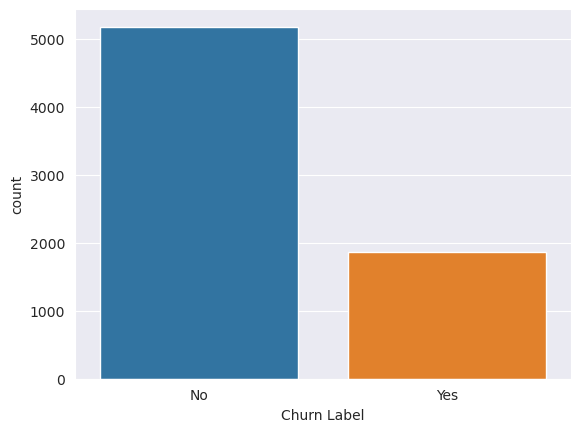

In [95]:
# set the background style of the plot
sns.set_style('darkgrid')
# plot target distribution
sns.countplot(data=df1, x="Churn Label")

* As the minority class is arround 26.5% of the data set, we can say that there is a mild imbalance. In our case the imbalance is not extreme. That is very important to know until experimenting with models to decide the best one for this case.  
* It is known that imbalanced classes (much more positive cases than negative cases) can be misleading for some machine learning model as the accuracy will be biased towards the majority class. But we can use some tactics to deal with a situation like that. For example using SMOTE, or algorithms that are less sensitive to imbalanced class like a tree-based or use a cost-sensitive algorithm that penalizes wrongly classified minority class. 

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


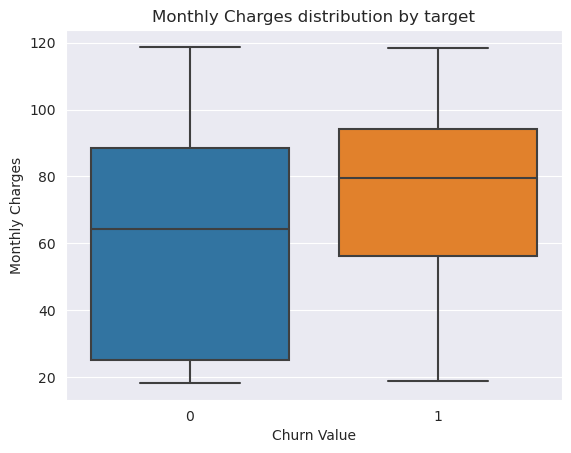

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


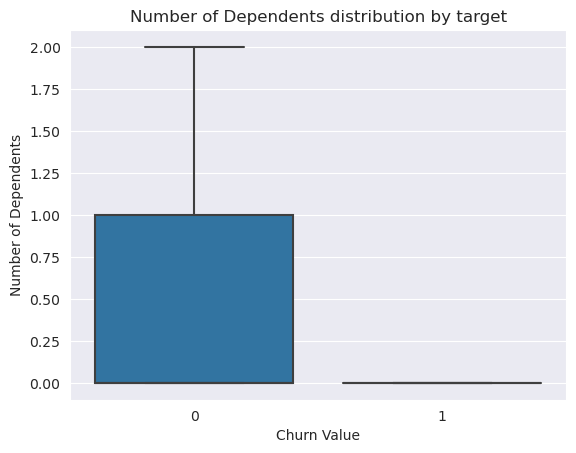

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


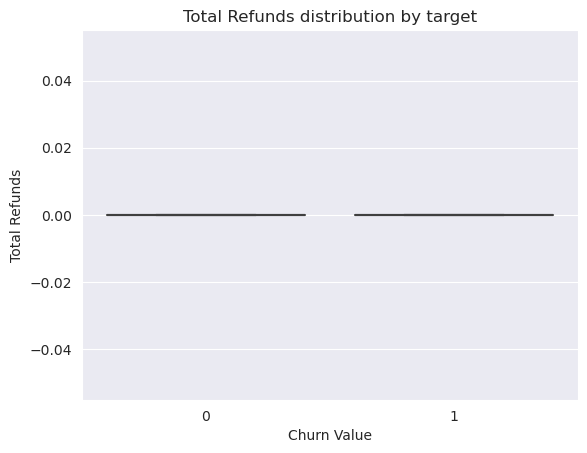

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


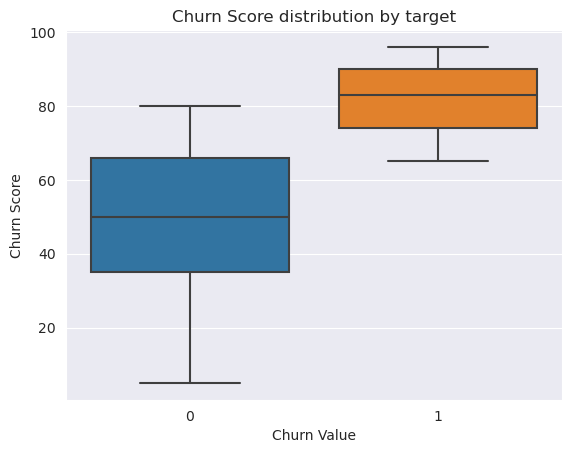

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


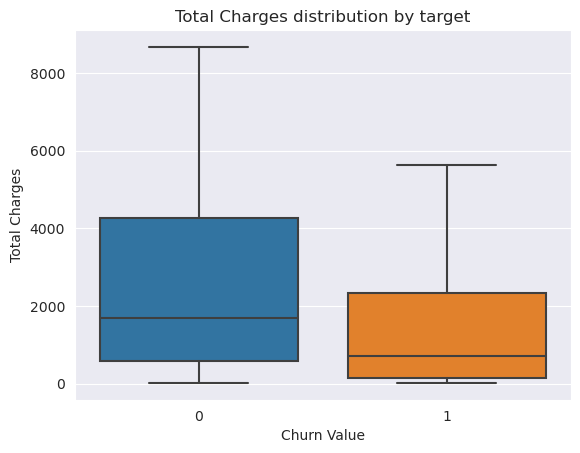

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


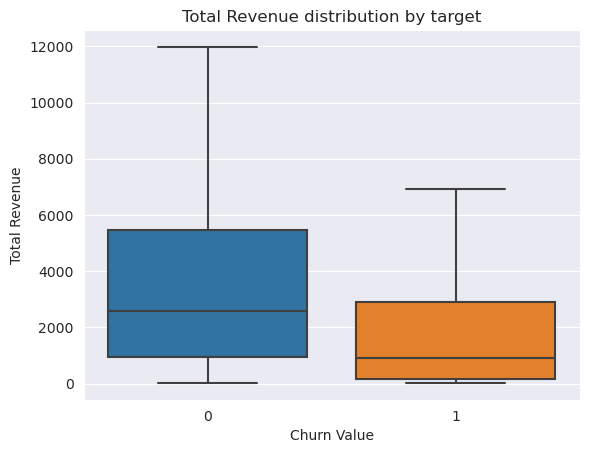

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


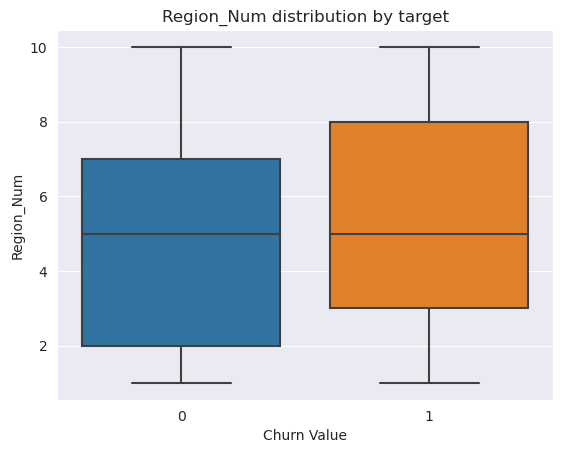

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


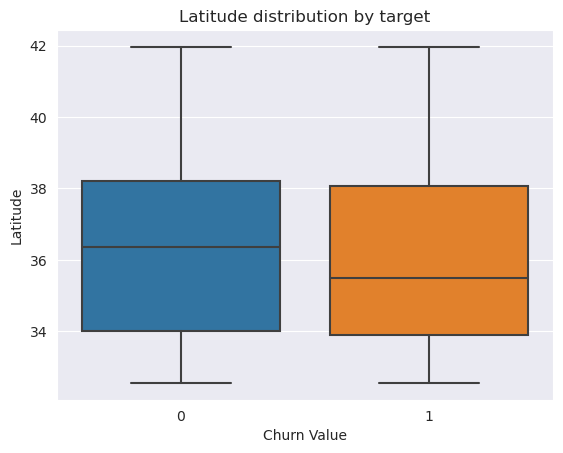

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


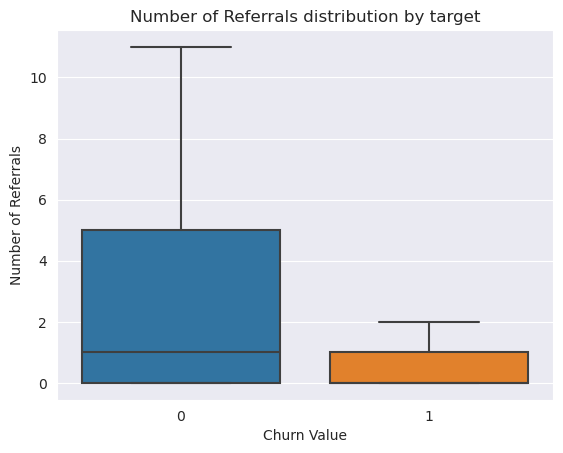

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


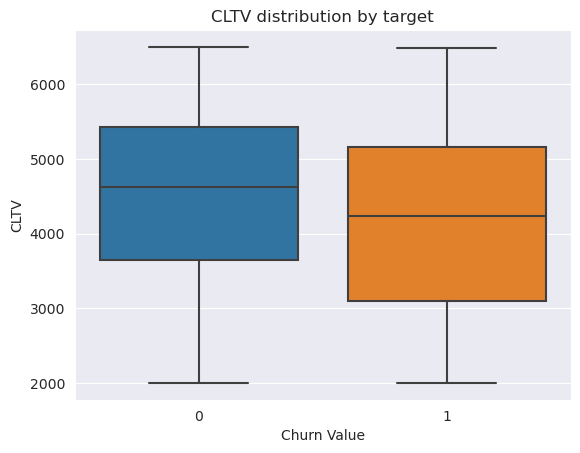

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


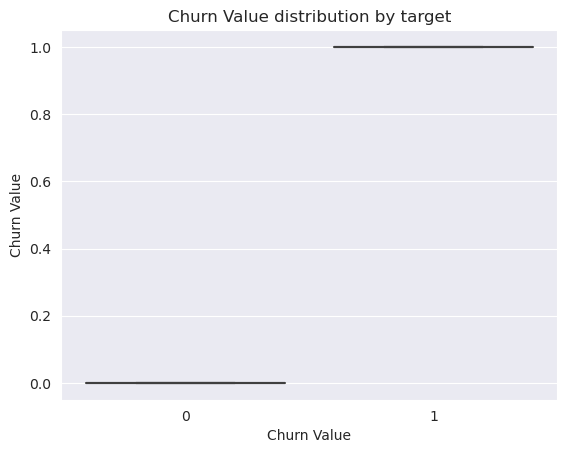

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


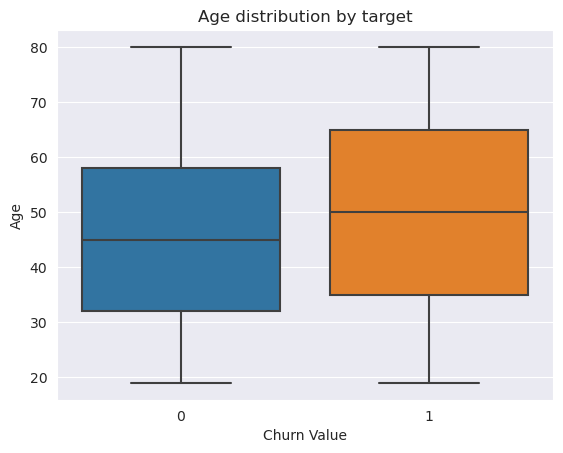

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


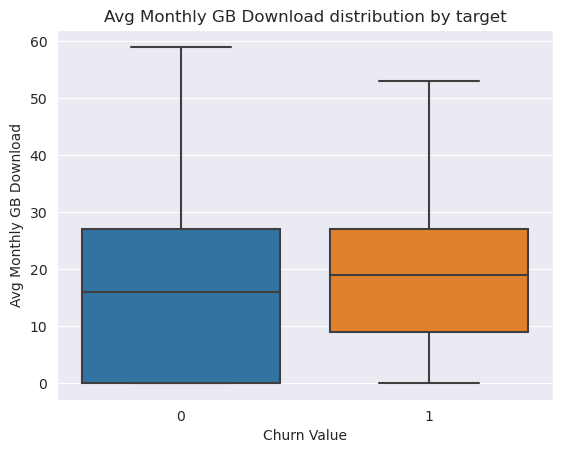

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


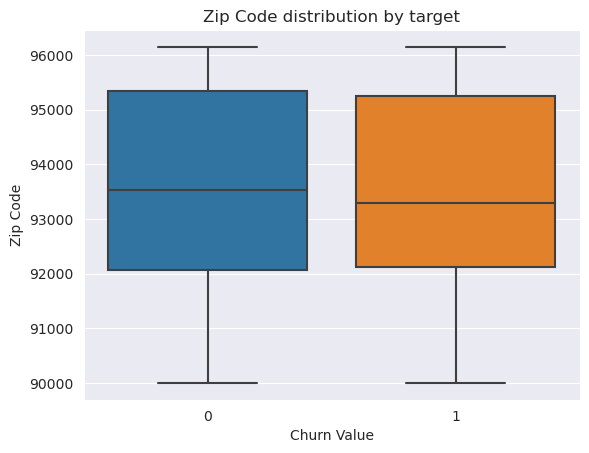

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


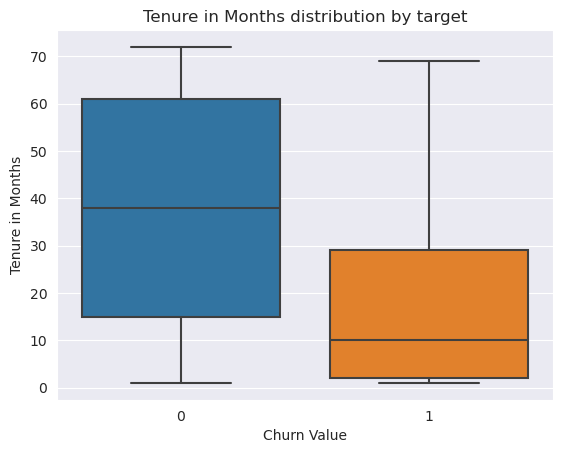

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


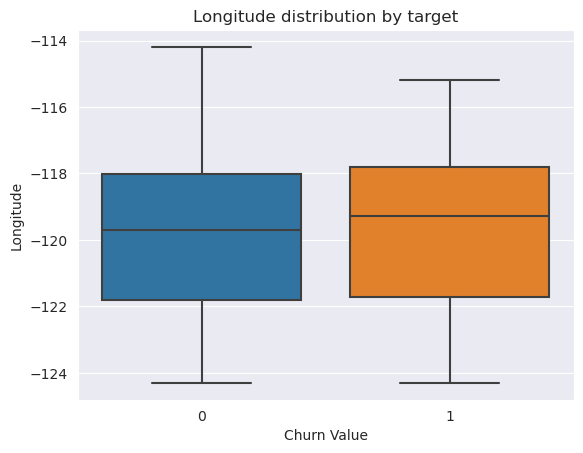

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


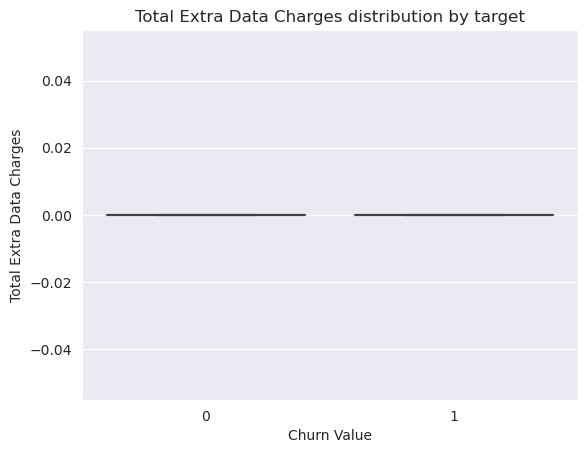

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


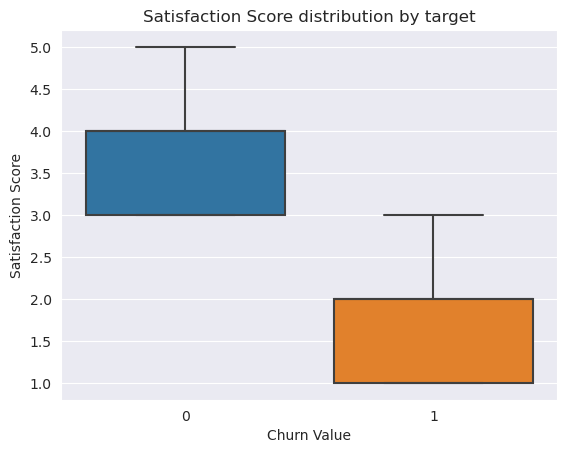

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


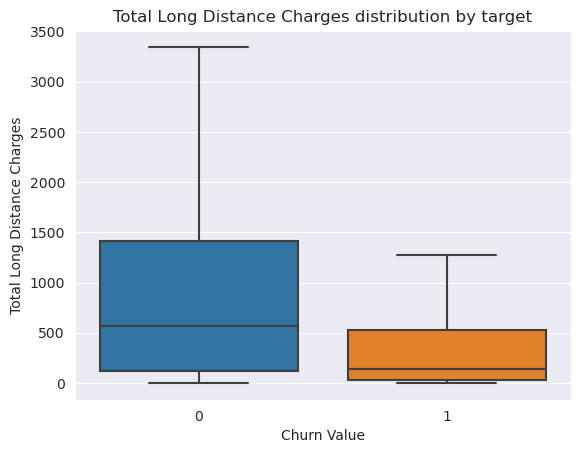

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


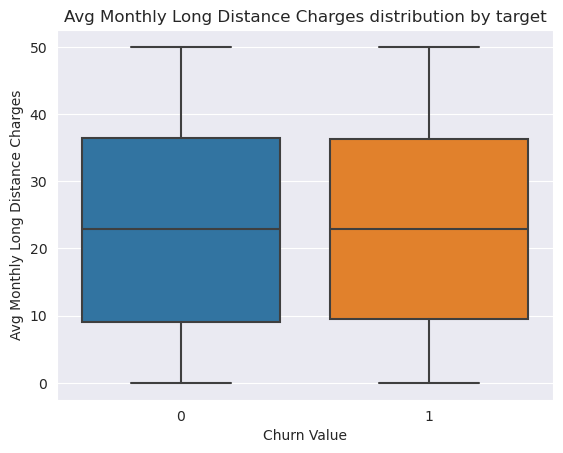

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


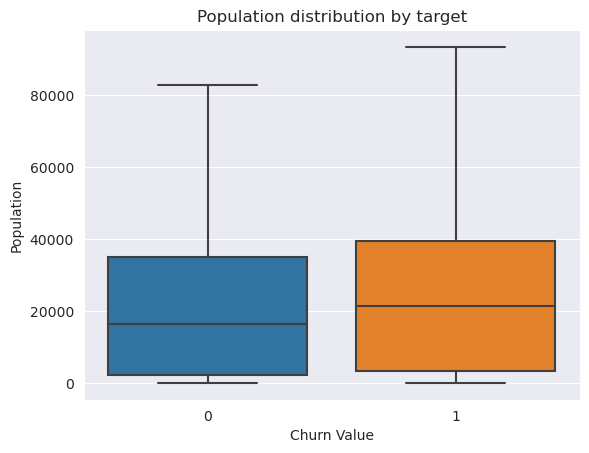

In [96]:
# sns.set_theme(style="whitegrid")
draw_boxplots_target(df=df1, variables=num_columns, target='Churn Value')

A priori we identify many features for churn discrimination except avg monthly long distance charges, zip code and Region_Num, which we cannot say help discriminating between target 0 and 1.  

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


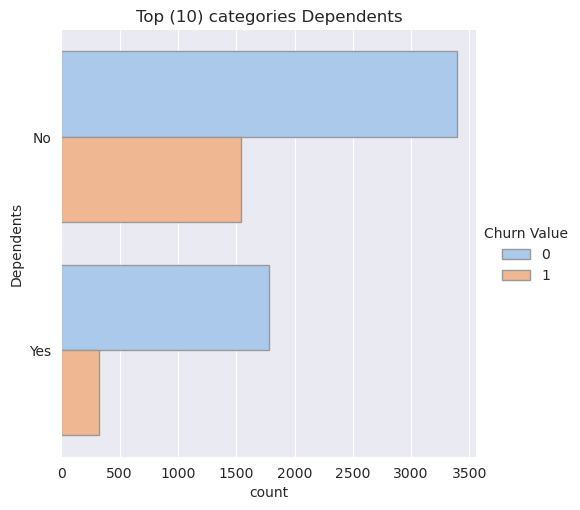

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


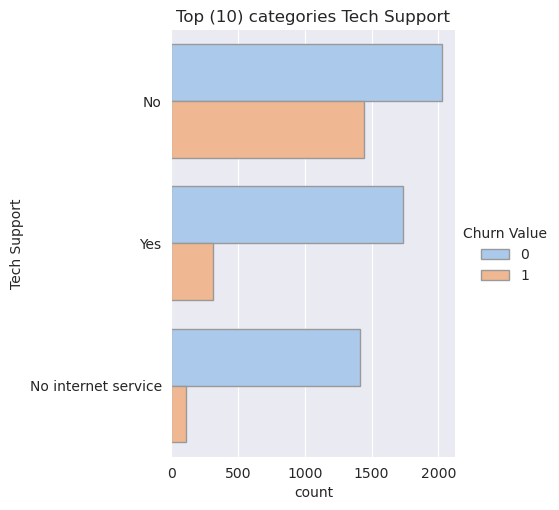

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


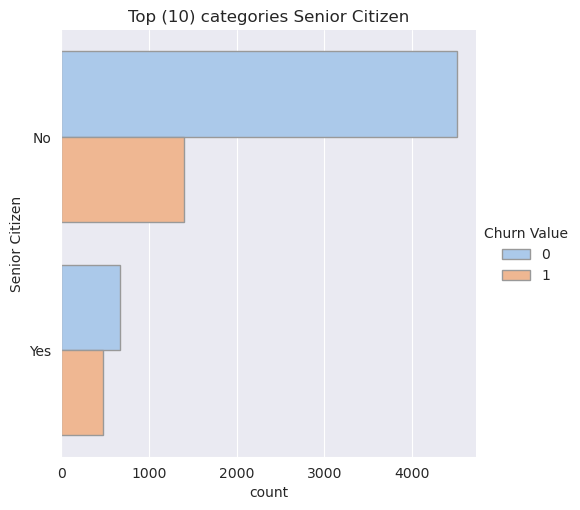

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


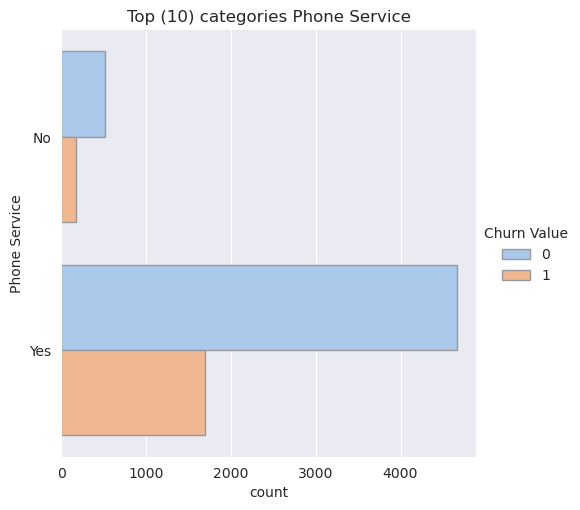

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


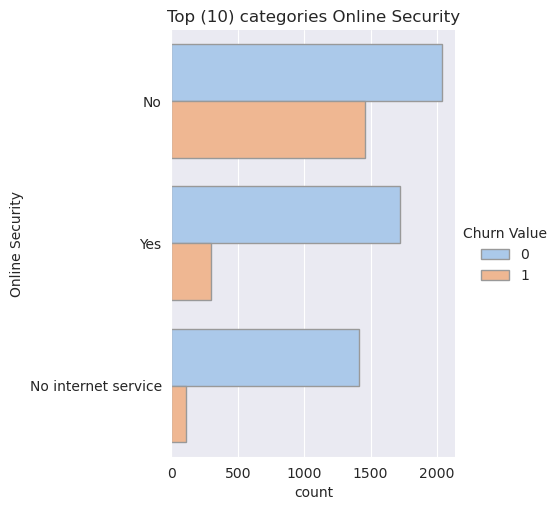

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


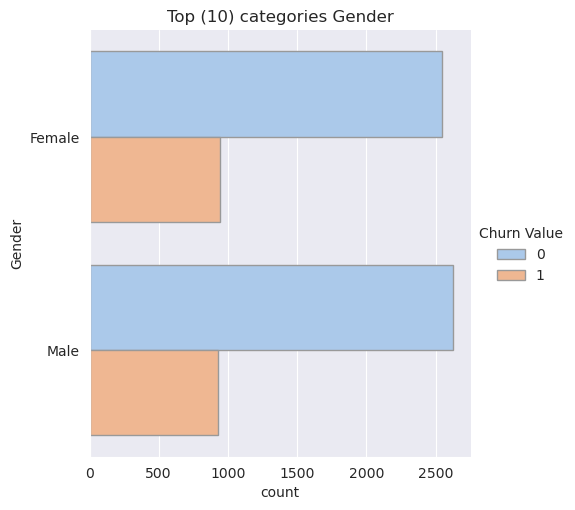

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


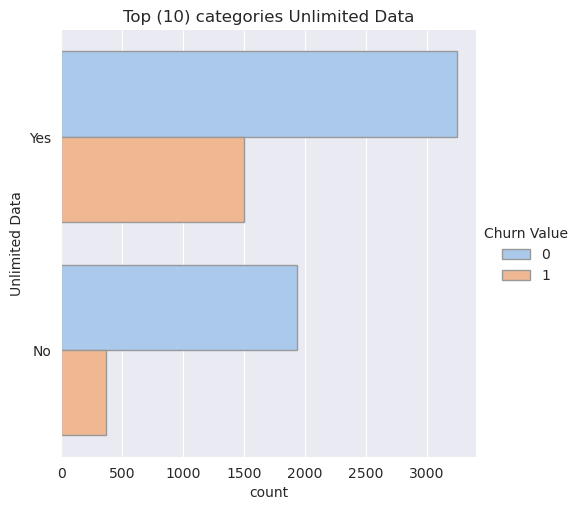

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


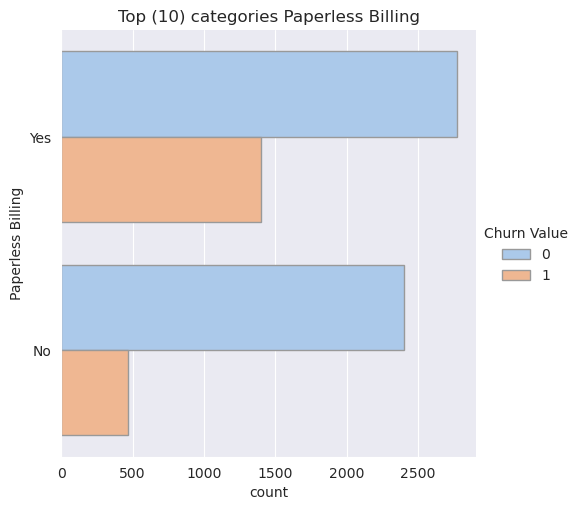

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


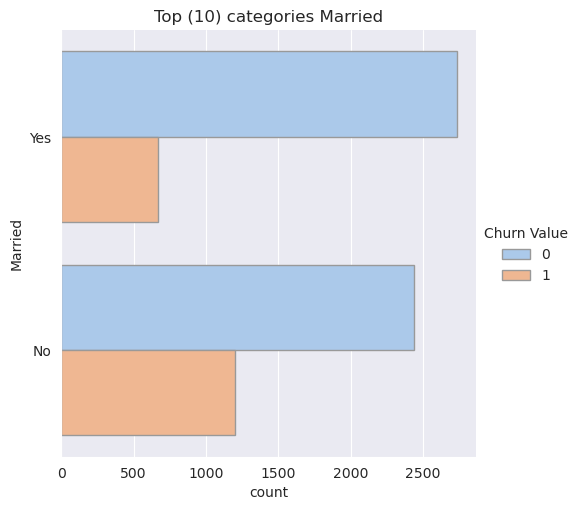

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


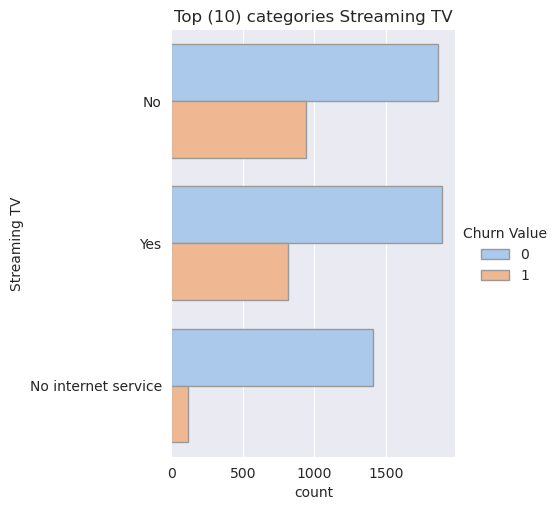

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


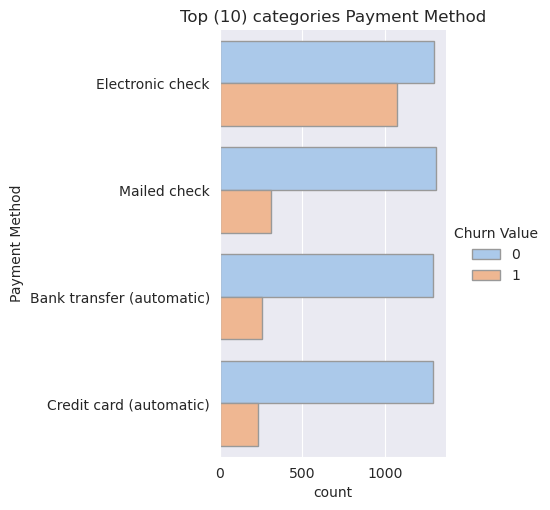

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


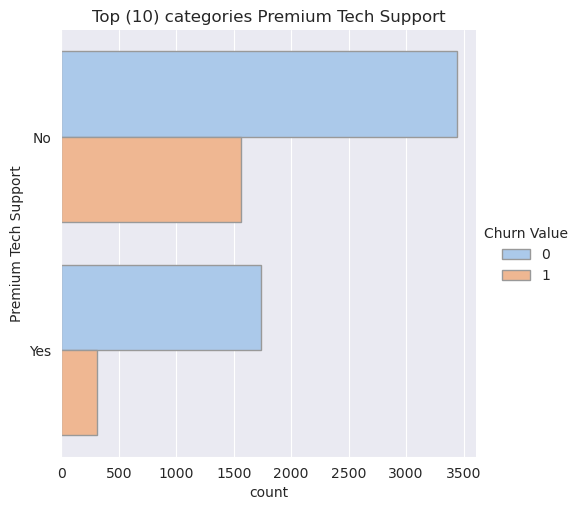

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


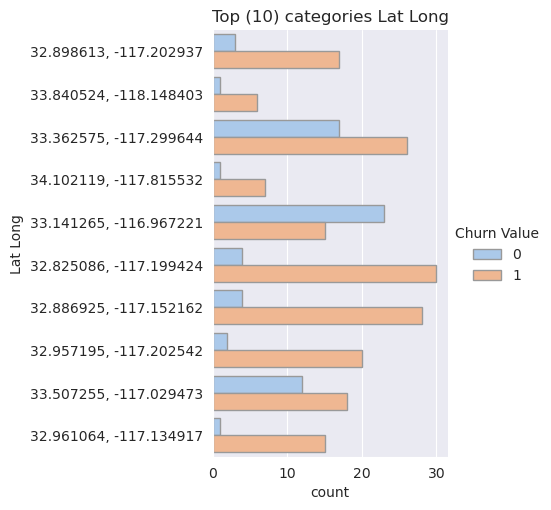

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


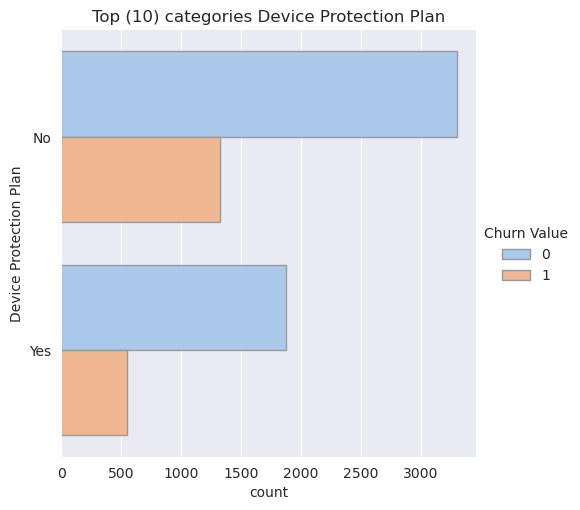

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


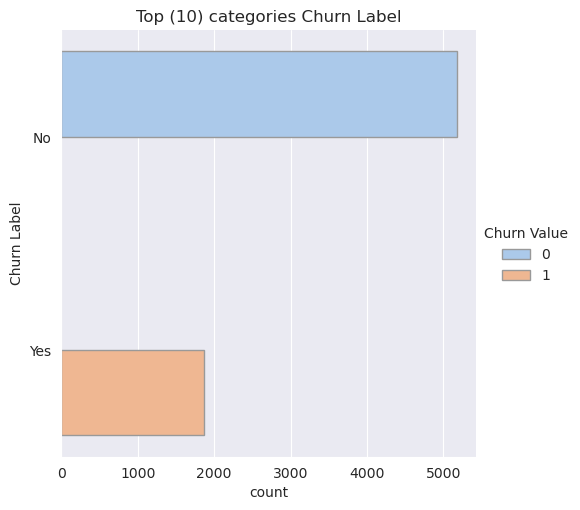

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


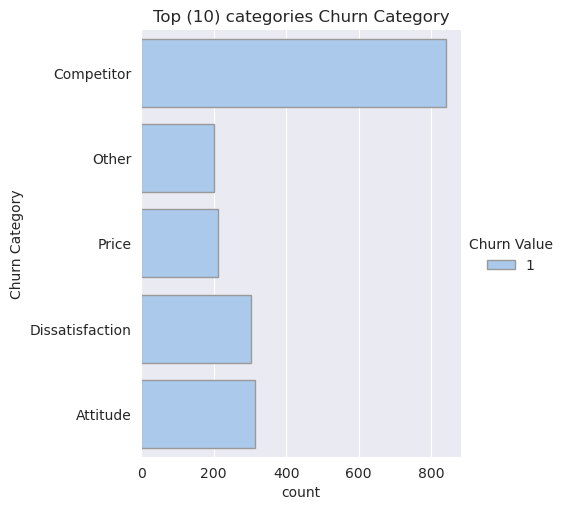

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


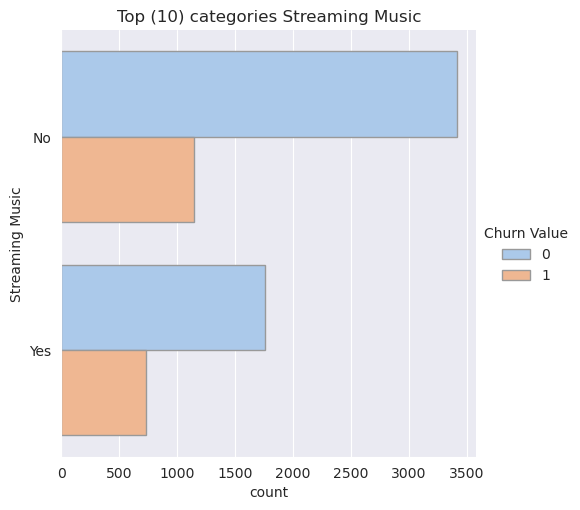

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


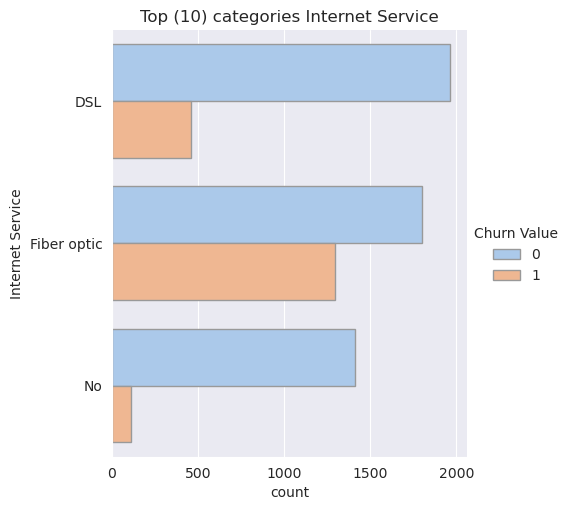

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


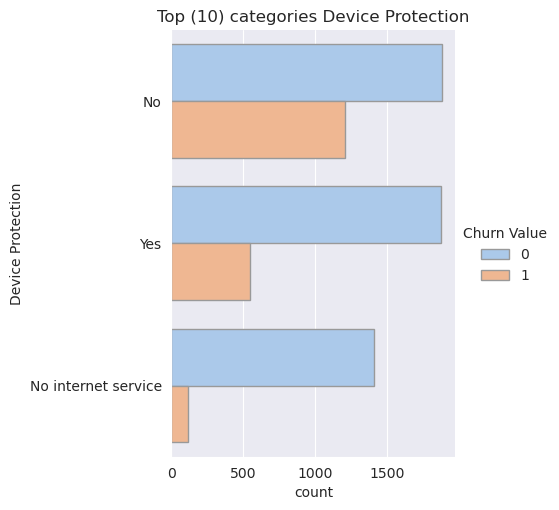

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


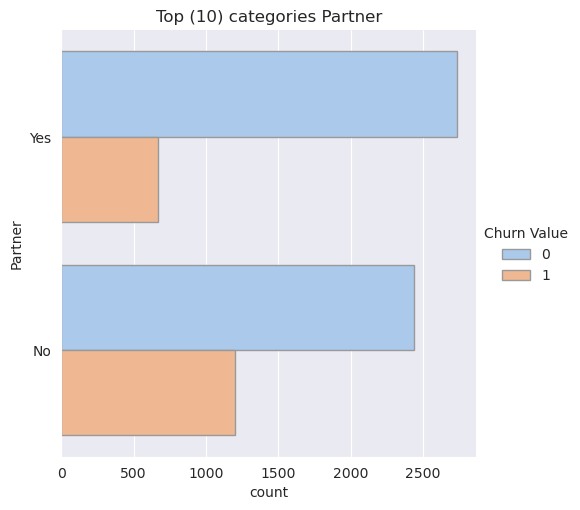

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


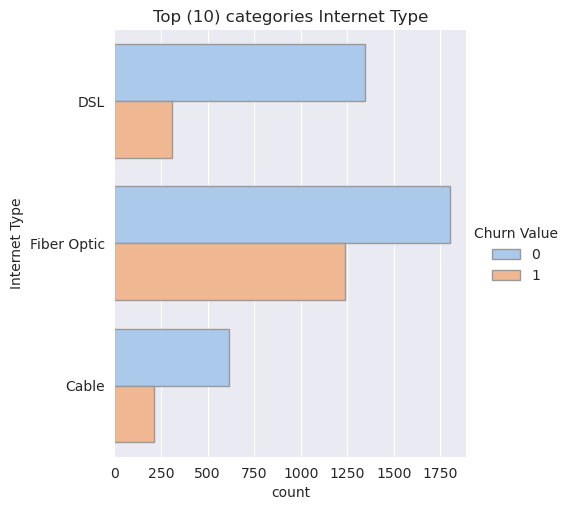

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


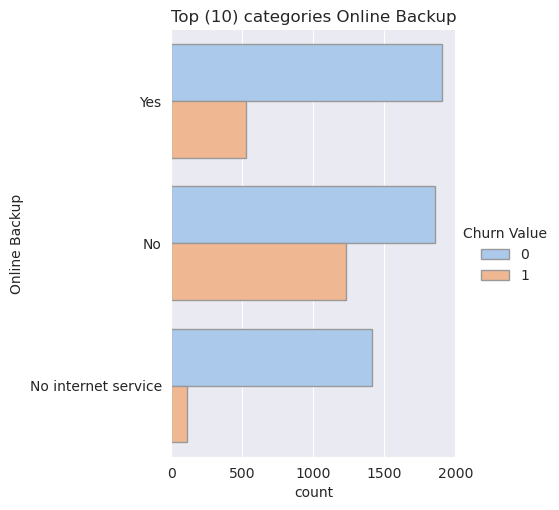

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


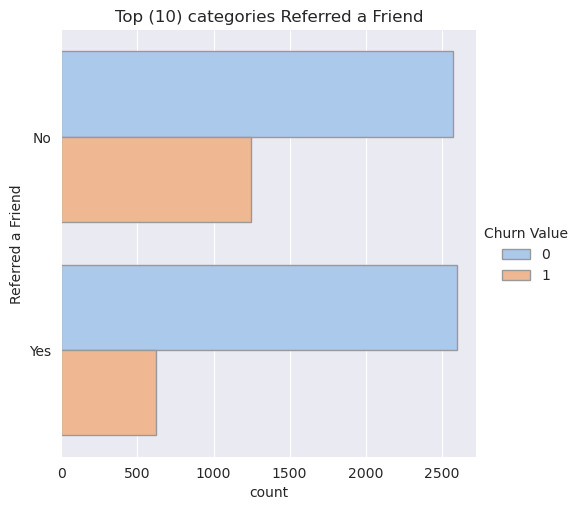

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


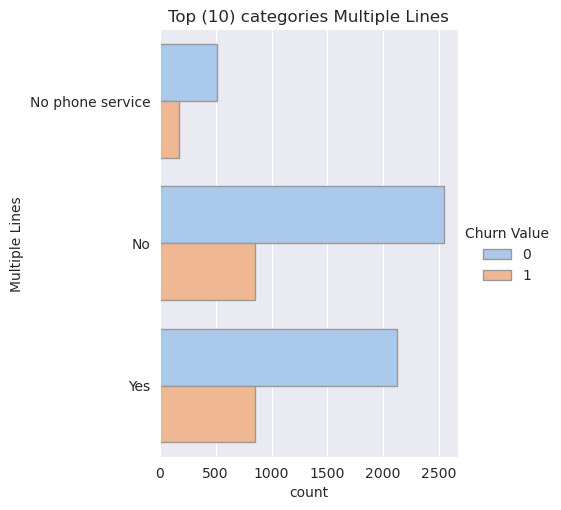

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


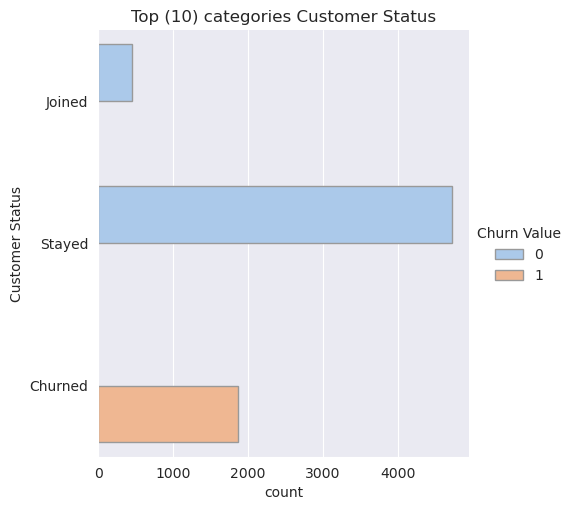

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


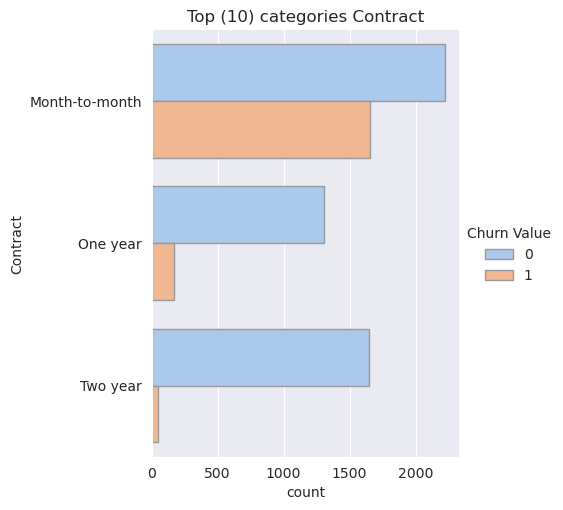

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


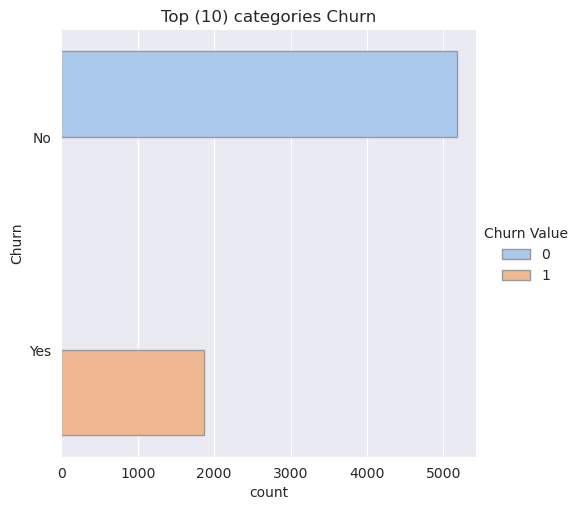

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


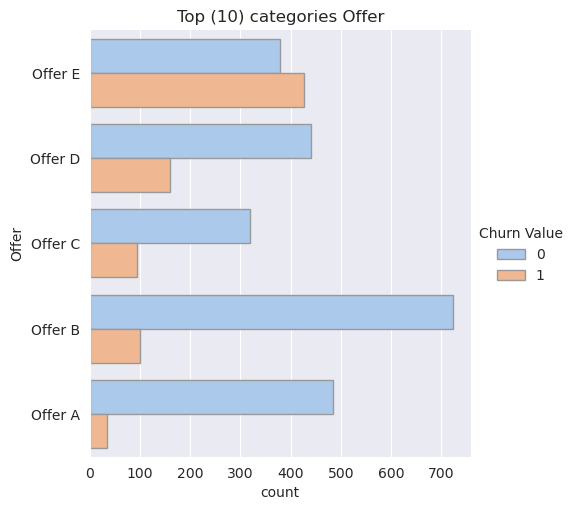

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


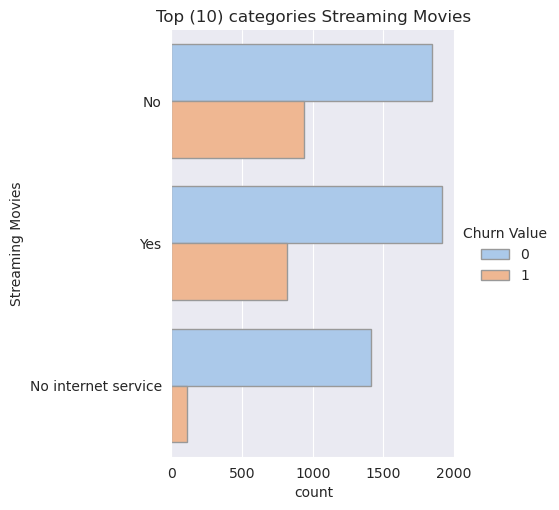

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


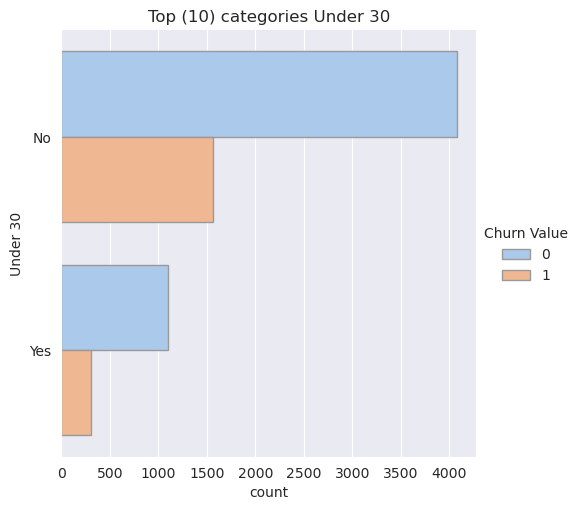

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


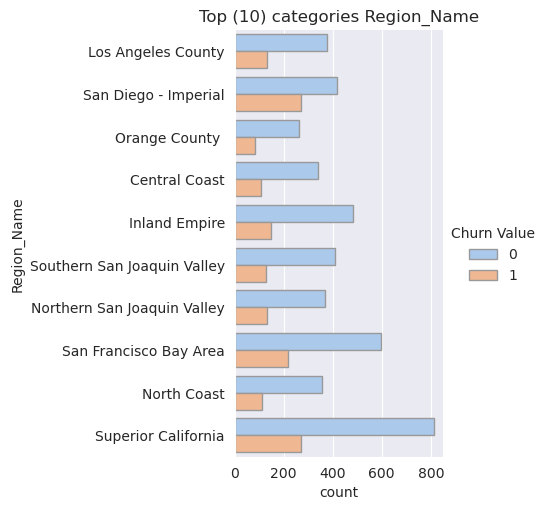

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


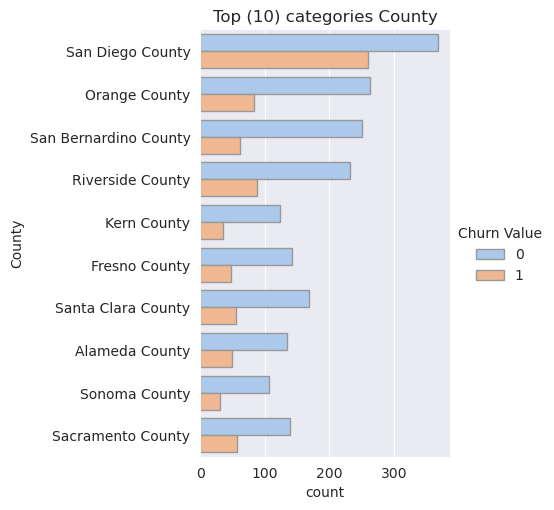

In [97]:
cat_cols = list(set(cat_cols) - set(["City", "Churn Reason"])) + ['Region_Name'] + ['County']
# analizo frecuencia por categoría
draw_catplots_target(df=df1, variables=cat_cols, target='Churn Value')

**Churn Profile**: 

* Many of these categorical variables seem to be useful to explain the target. 

* For example, it seems that churners are not partners, recieve more offers D and E, don’t receive (premium) tech support, have unlimited data, there are more share of churners between senior citizens (but they are relatively few), are more present between internet service fiber optic, there doesn't seem to be a gender bias. 

In [98]:
df1.head()

,Customer ID,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Age,Number of Dependents,Gender,Married,Under 30,Zip Code,Lat Long,Longitude,Location ID,Latitude,Population,Avg Monthly GB Download,Tenure in Months,Total Refunds,Total Extra Data Charges,Internet Type,Unlimited Data,Device Protection Plan,Total Long Distance Charges,Referred a Friend,Service ID,Avg Monthly Long Distance Charges,Total Revenue,Streaming Music,Offer,Number of Referrals,Premium Tech Support,Satisfaction Score,Churn Score,Churn Label,Customer Status,Churn Category,Status ID,CLTV,Churn Value,Location_geocode,County,LA,County_short,County_,Region_Num,Region_Name,Charges_per_tenure
0,7590-VHVEG,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,36,0,Female,Yes,No,90001,"33.973616, -118.24902",-118.249020,KQVCVY8549,33.973616,54492,10,1,0.0,0,DSL,Yes,No,0.00,No,FRZCGDEGJ1299,0.00,29.85,No,Offer E,0,No,3,27,No,Joined,NaN,GODTMI5747,3964,0,"1427, East 74th Street, Florence-Firestone, Fi...",NaN,NaN,nan,nan,NaN,NaN,29.850000
1,5575-GNVDE,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,46,0,Male,No,No,90002,"33.949255, -118.246978",-118.246978,PIYXEN8915,33.949255,44586,16,34,0.0,0,DSL,Yes,Yes,581.06,No,ZYMHBYTQE1796,17.09,2470.56,No,NaN,0,No,3,61,No,Stayed,NaN,JXJTVI9837,3441,0,"1527, East 96th Street, Watts, Los Angeles, Ca...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County,55.573529
2,3668-QPYBK,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,37,0,Male,No,No,90003,"33.964131, -118.272783",-118.272783,PZZUIT6837,33.964131,58198,21,2,0.0,0,DSL,Yes,No,20.94,No,ZLZTZWPWE3351,10.47,129.09,No,NaN,0,No,1,86,Yes,Churned,Competitor,SUDNGT6444,3239,1,"148, East 82nd Place, Florence, Los Angeles, C...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County,54.075000
3,7795-CFOCW,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,53,0,Male,No,No,90004,"34.076259, -118.310715",-118.310715,KVBPAB7894,34.076259,67852,10,45,0.0,0,DSL,Yes,Yes,0.00,No,KXVIIYGAJ8877,0.00,1840.75,No,NaN,0,Yes,3,66,No,Stayed,NaN,RJWCXJ6879,4307,0,"Universal Cleaners, 4650, Beverly Boulevard, W...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County,40.905556
4,9237-HQITU,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,19,2,Female,No,Yes,90005,"34.059281, -118.30742",-118.307420,CKNALR2542,34.059281,43019,51,2,0.0,0,Fiber Optic,Yes,No,18.24,No,GXJVSQIYH4715,9.12,169.89,No,NaN,0,No,2,67,Yes,Churned,Other,KZSZDV8891,2701,1,"722, South Oxford Avenue, Koreatown, Los Angel...",NaN,Los Angeles,nan,Los Angeles,8.0,Los Angeles County,75.825000


In [99]:
len(df1["County_"].value_counts())

58

In [100]:
# cols to drop for training
cols_to_drop = ["Customer ID", "Churn", "Zip Code", "Latitude", "Location ID", "Lat Long", "Longitude", "Service ID", "Status ID", "CLTV", 
               "Churn Score", "Churn Category", "Customer Status", "Churn Label", "Location_geocode", "County", "County_short", "Region_Num", "LA", "County_"]
df_train = df1.drop(columns=cols_to_drop)

In [101]:
df_train.rename(columns={'Churn Value': 'target'}, inplace=True)

## Training Set

This is the resulting training set, after cleaning, feature engineering and column selection. 

From here the automatic process of null filling, standardization of selected numerical variables and encoding of categorical variables begins. Then we will proceed to separate datasets into train, test and validation sets.

In [58]:
df_train.info()
# float64(7), int64(9), object(26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Senior Citizen                     7043 non-null   object 
 1   Partner                            7043 non-null   object 
 2   Dependents                         7043 non-null   object 
 3   Phone Service                      7043 non-null   object 
 4   Multiple Lines                     7043 non-null   object 
 5   Internet Service                   7043 non-null   object 
 6   Online Security                    7043 non-null   object 
 7   Online Backup                      7043 non-null   object 
 8   Device Protection                  7043 non-null   object 
 9   Tech Support                       7043 non-null   object 
 10  Streaming TV                       7043 non-null   object 
 11  Streaming Movies                   7043 non-null   objec

In [111]:
df_train_path = os.path.join(f"s3://{bucket}/sagemaker/processed_data/", "df_train.csv")
# save dataset to s3 bucket 
df_train.to_csv(df_train_path, index=False)

In [122]:
sum_df_tot = summary(df_train)

In [123]:
sum_df_tot

,variable,dtype,unique,empty,na,%_na,null,%_null,zeros,%_zeros
0,Senior Citizen,object,2,0,0,0.0,0,0.0,0,0.0
1,Partner,object,2,0,0,0.0,0,0.0,0,0.0
2,Dependents,object,2,0,0,0.0,0,0.0,0,0.0
3,Phone Service,object,2,0,0,0.0,0,0.0,0,0.0
4,Multiple Lines,object,3,0,0,0.0,0,0.0,0,0.0
5,Internet Service,object,3,0,0,0.0,0,0.0,0,0.0
6,Online Security,object,3,0,0,0.0,0,0.0,0,0.0
7,Online Backup,object,3,0,0,0.0,0,0.0,0,0.0
8,Device Protection,object,3,0,0,0.0,0,0.0,0,0.0
9,Tech Support,object,3,0,0,0.0,0,0.0,0,0.0


In [124]:
sum_df_tot[sum_df_tot['%_na']>0.0]

,variable,dtype,unique,empty,na,%_na,null,%_null,zeros,%_zeros
16,Total Charges,float64,6531,0,11,0.2,11,0.2,0,0.0
27,Internet Type,object,4,0,1526,21.7,1526,21.7,0,0.0
35,Offer,object,6,0,3877,55.0,3877,55.0,0,0.0
40,Region_Name,object,11,0,1013,14.4,1013,14.4,0,0.0
41,Charges_per_tenure,float64,6570,0,11,0.2,11,0.2,0,0.0


## <span style="color:lightblue"><a class="anchor" id="Pre-processing"> Pre-processing with scikit-learn </a></span>

Sklearn from sagemaker will be used to generate the final training dataset, with already standardized columns and encoded categories. The *%%writefile* writes the contents of that cell (processing steps) to a file named preprocessing.py that will be the input for the processing job. 

The job will execute the predefined code. High level, it will do the following: 

* Read Input Data: The script reads the input data from a CSV file (df_train.csv) into a pandas DataFrame.
* Handle Missing Data: It handles missing data by replacing missing values in categorical, numerical, and integer columns with appropriate values.
* Preprocessing: It performs preprocessing and feature engineering transformations on the data using scikit-learn transformers such as OneHotEncoder and StandardScaler. The preprocessed data is split into train, validation, and test sets.
* Save Output Data: Finally, the script saves the preprocessed data, feature names, and split datasets into CSV files in the specified output paths.

In [ ]:
%%writefile preprocessing.py

import argparse
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action="ignore", category=DataConversionWarning)

def print_shape(df):
    negative_examples, positive_examples = np.bincount(df["target"])
    print(
        "Data shape: {}, {} positive examples, {} negative examples".format(
            df.shape, positive_examples, negative_examples
        )
    )


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--train-test-split-ratio", type=float, default=0.3)
    args, _ = parser.parse_known_args()

    print("Received arguments {}".format(args))

    input_data_path = os.path.join("/opt/ml/processing/input", "df_train.csv")

    print("Reading input data from {}".format(input_data_path))
    df_train = pd.read_csv(input_data_path)
    cat_cols = list(df_train.select_dtypes(include='object').columns)
    num_cols = list(df_train.select_dtypes(include='float64').columns)
    int_cols = list(df_train.select_dtypes(include='int64').columns)
    df_train.drop_duplicates(inplace=True)
    
    # handle missing data
    for cat in cat_cols: 
        df_train[cat] = df_train[cat].fillna('sin dato')
    
    for num in num_cols: 
        df_train[num] = df_train[num].fillna(0.0)
    
    for i in int_cols: 
        df_train[i] = df_train[i].fillna(0)
    
    negative_examples, positive_examples = np.bincount(df_train["target"])
    print_shape(df_train)
    
    # Create transformers for categorical and numerical features
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
    numerical_transformer = StandardScaler()

    # Create the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_cols),
            ('num', numerical_transformer, num_cols)
        ]
    )
    
    print("Running preprocessing and feature engineering transformations")
    df_train_ = preprocessor.fit_transform(df_train.drop("target", axis=1))
    print("Train data shape after preprocessing: {}".format(df_train_.shape))
       
    split_ratio = args.train_test_split_ratio
    print("Splitting data into train and test sets with ratio {}".format(split_ratio))
    X_train, X_test, y_train, y_test = train_test_split(df_train_, 
                                                        df_train["target"], 
                                                        test_size=split_ratio, 
                                                        random_state=2023)
    
    print("Splitting data into train and validation sets with ratio 0.15")
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                        y_train, 
                                                        test_size=0.15, 
                                                        random_state=2023)
    
    train = pd.concat([pd.Series(y_train, index=y_train.index,
                             name='target', dtype=int), pd.DataFrame(X_train, index=y_train.index)], axis=1)
    validation = pd.concat([pd.Series(y_valid, index=y_valid.index,
                            name='target', dtype=int), pd.DataFrame(X_valid, index=y_valid.index)], axis=1)
    test = pd.concat([pd.Series(y_test, index=y_test.index,
                            name='target', dtype=int), pd.DataFrame(X_test, index=y_test.index)], axis=1)
    
    negative_examples, positive_examples = np.bincount(train["target"])
    print(
        "Train data after spliting: {}, {} positive examples, {} negative examples, {} churn rate".format(
            train.shape, positive_examples, negative_examples, round(100*positive_examples/(positive_examples+negative_examples),2) 
        )
    )

    negative_examples, positive_examples = np.bincount(validation["target"])
    print(
        "Validation data after spliting: {}, {} positive examples, {} negative examples, {} churn rate".format(
            validation.shape, positive_examples, negative_examples, round(100*positive_examples/(positive_examples+negative_examples),2) 
        )
    )
    
    negative_examples, positive_examples = np.bincount(test["target"])
    print(
        "Test data after spliting: {}, {} positive examples, {} negative examples, {} churn rate".format(
            test.shape, positive_examples, negative_examples, round(100*positive_examples/(positive_examples+negative_examples),2) 
        )
    )

    train_output_path = os.path.join("/opt/ml/processing/train", "train.csv")
    validation_output_path = os.path.join("/opt/ml/processing/validation", "validation.csv")
    test_output_path = os.path.join("/opt/ml/processing/test", "test.csv")
    feat_out_path = os.path.join("/opt/ml/processing/features", "features.csv")
    feat_names_out = preprocessor.get_feature_names_out()
    
    print("Saving feature names after preprocessing to {}".format(feat_out_path))
    pd.DataFrame(feat_names_out).to_csv(feat_out_path, index=False)
    
    print("Saving train set to {}".format(train_output_path))
    train.to_csv(train_output_path, index=False)
    
    print("Saving validation set to {}".format(validation_output_path))
    validation.to_csv(validation_output_path, index=False)

    print("Saving test set to {}".format(test_output_path))
    test.to_csv(test_output_path, index=False)

In [62]:
# Get the current AWS region
region = boto3.session.Session().region_name
# Get the SageMaker execution role
role = get_execution_role()
# Define tags for the SageMaker resources
tags = [{'Key': 'Project', 'Value': 'MLCompetency'}]

# Create an SKLearnProcessor instance for running scikit-learn scripts on SageMaker
sklearn_processor = SKLearnProcessor(
    framework_version="1.2-1",  # Specify the version of the scikit-learn framework
    role=role,  # Specify the SageMaker execution role
    instance_type="ml.t3.xlarge",  # Specify the type of SageMaker instance
    instance_count=1,  # Specify the number of instances to use
    tags=tags  # Specify tags to apply to the SageMaker resources
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


INFO:sagemaker.image_uris:Defaulting to only available Python version: py3


In [57]:
# df_train_path = os.path.join(f"s3://{bucket}/sagemaker/processed_data/", "df_train.csv").format(region)
# df_train = pd.read_csv(df_train_path) # , nrows=10
# df_train.head()

,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Avg Monthly Long Distance Charges,Total Revenue,Streaming Music,Offer,Number of Referrals,Premium Tech Support,Satisfaction Score,target,Region_Name,Charges_per_tenure
0,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,...,0.00,29.85,No,Offer E,0,No,3,0,NaN,29.850000
1,No,No,No,Yes,No,DSL,Yes,No,Yes,No,...,17.09,2470.56,No,NaN,0,No,3,0,Los Angeles County,55.573529
2,No,No,No,Yes,No,DSL,Yes,Yes,No,No,...,10.47,129.09,No,NaN,0,No,1,1,Los Angeles County,54.075000
3,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,...,0.00,1840.75,No,NaN,0,Yes,3,0,Los Angeles County,40.905556
4,No,No,No,Yes,No,Fiber optic,No,No,No,No,...,9.12,169.89,No,NaN,0,No,2,1,Los Angeles County,75.825000


In [63]:
# Run a preprocessing script using the SKLearnProcessor instance
sklearn_processor.run(
    code="preprocessing.py",  # Specify the script to run
    inputs=[  # Specify the input data for processing
        ProcessingInput(source=df_train_path, destination="/opt/ml/processing/input")
    ],
    outputs=[  # Specify the output locations for processed data
        ProcessingOutput(output_name="features_data", source="/opt/ml/processing/features"),
        ProcessingOutput(output_name="train_data", source="/opt/ml/processing/train"),
        ProcessingOutput(output_name="validation_data", source="/opt/ml/processing/validation"),
        ProcessingOutput(output_name="test_data", source="/opt/ml/processing/test"),
    ],
    arguments=["--train-test-split-ratio", "0.2"]  # Specify additional arguments to pass to the script
)

INFO:sagemaker:Creating processing-job with name sagemaker-scikit-learn-2024-03-21-15-54-39-544


............................Received arguments Namespace(train_test_split_ratio=0.2)
Reading input data from /opt/ml/processing/input/df_train.csv
Data shape: (7043, 42), 1869 positive examples, 5174 negative examples
Running preprocessing and feature engineering transformations
/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Train data shape after preprocessing: (7043, 85)
Splitting data into train and test sets with ratio 0.2
Splitting data into train and validation sets with ratio 0.15
Train data after spliting: (4788, 86), 1239 positive examples, 3549 negative examples, 25.88 churn rate
Validation data after spliting: (846, 86), 249 positive examples, 597 negative examples, 29.43 churn rate
Test data after spliting: (1409, 86), 381 positive examples, 1028 negative

In [64]:
# Describe the preprocessing job to get information about its output configuration
preprocessing_job_description = sklearn_processor.jobs[-1].describe()

# Extract information about the output locations from the preprocessing job description
output_config = preprocessing_job_description["ProcessingOutputConfig"]
for output in output_config["Outputs"]:
    # Check each output name and extract the corresponding S3 URI
    if output["OutputName"] == "features_data":
        preprocessed_features_data = output["S3Output"]["S3Uri"]
    if output["OutputName"] == "train_data":
        preprocessed_train_data = output["S3Output"]["S3Uri"]
    if output["OutputName"] == "validation_data":
        preprocessed_validation_data = output["S3Output"]["S3Uri"]
    if output["OutputName"] == "test_data":
        preprocessed_test_data = output["S3Output"]["S3Uri"]
        
# Print the S3 URIs for the preprocessed data    
print(preprocessed_features_data)
print(preprocessed_train_data)
print(preprocessed_validation_data)
print(preprocessed_test_data)

s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/features_data
s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/train_data
s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/validation_data
s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/test_data


### Check preprocessed data 

In [ ]:
# preprocessed_features_data = "s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/features_data"
# preprocessed_train_data = "s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/train_data"
# preprocessed_validation_data = "s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/validation_data"
# preprocessed_test_data = "s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-21-15-54-39-544/output/test_data"

In [163]:
train_ = pd.read_csv(preprocessed_train_data + "/train.csv") # , header=None
print("Training set shape: {}".format(train_.shape))
train_.head(n=10)

Training set shape: (4788, 86)


,target,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.162869,-0.961772,-0.248313,-0.836746,1.149157,-1.010094,1.158028
1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.823863,-0.040847,-0.248313,-0.093621,0.320518,-0.061916,0.873285
2,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,-0.660122,-0.985971,-0.248313,-0.835482,1.218426,-1.028865,-0.654086
3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.687595,0.004485,-0.248313,-0.779659,-1.280438,-0.228774,0.564412
4,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,-1.479388,-1.005780,-0.248313,-0.729387,-0.634359,-0.942505,-2.137475
5,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.686335,2.711252,5.103461,2.246564,0.897328,2.792153,1.728454
6,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.140864,-0.782144,-0.248313,-0.810831,-0.906904,-0.860324,0.254921
7,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.471562,1.522264,-0.248313,1.329767,0.199459,1.595340,0.491838
8,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.689257,0.945109,-0.248313,1.159143,0.710237,1.088307,0.727049
9,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.827186,0.389064,-0.248313,1.102883,1.626272,0.645731,0.846860


In [141]:
validation_ = pd.read_csv(preprocessed_validation_data + "/validation.csv") # , header=None
print("Training set shape: {}".format(validation_.shape))
validation_.head(n=10)

Training set shape: (846, 86)


,target,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.178603,-0.848763,-0.248313,-0.884833,-1.486303,-0.934896,-1.157635
1,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.317015,-0.590913,-0.248313,-0.264929,1.127146,-0.547720,0.252288
2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,-1.481050,-0.552575,-0.248313,0.172007,-0.279598,-0.388275,-1.430436
3,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.877040,0.315762,-0.248313,0.531149,1.017093,0.404831,1.054865
4,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,-1.505977,-0.903381,-0.248313,-0.173871,1.511039,-0.768020,-1.547627
5,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-0.118376,0.931123,-0.248313,-0.884833,-1.486303,0.473253,-0.122983
6,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.807245,1.723289,-0.248313,2.963360,1.615266,2.237102,0.867880
7,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,-1.512624,-0.840226,-0.248313,0.249824,1.623035,-0.592855,-1.517607
8,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-1.353091,-0.462728,-0.248313,1.767329,1.205479,0.154220,-1.384401
9,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.398844,2.381358,-0.248313,-0.217221,-0.978115,1.852781,1.385345


In [142]:
test_ = pd.read_csv(preprocessed_test_data + "/test.csv") # , header=None
print("Test labels shape: {}".format(test_.shape))
test_.head(n=10)

Test labels shape: (1409, 86)


,target,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.684272,0.272151,-0.248313,0.060549,0.037615,0.231267,0.677136
1,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.483596,1.752805,-0.248313,-0.345534,-0.967757,1.282684,1.486636
2,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,-1.474403,-0.888160,-0.248313,-0.555988,0.015605,-0.868893,-1.403490
3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.695904,1.030765,-0.248313,0.795442,0.251249,1.048600,0.739977
4,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.195703,1.205054,-0.248313,2.782354,1.305174,1.773616,0.161920
5,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.544681,-0.585641,-0.248313,-0.825867,-1.237712,-0.709305,0.282658
6,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.707537,-0.897756,-0.248313,-0.820127,-0.304198,-0.954537,0.558945
7,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.191495,0.629950,-0.248313,-0.884833,-1.486303,0.234981,-0.193185
8,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,-0.164907,0.519588,4.182181,0.619349,-0.014174,0.579930,-0.097727
9,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.501474,0.894946,-0.248313,-0.397519,-0.991710,0.588632,0.498346


## <span style="color:lightblue"><a class="anchor" id="Model-Selection"> Model Selection </a></span>

In this use case, a tree-based model XGBoost is chosen due to consideration of imbalanced class, and in the family of tree based models, XGBoost usually gives best results as its built for model performance and computational speed. 

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm known for its efficiency and effectiveness in handling structured/tabular data. XGBoost is a good choice for a churn classification problem due to its ability to:

* Handle Imbalanced Data: Churn classification problems often involve imbalanced datasets, where the number of churners (positive class) is significantly lower than the number of non-churners (negative class). XGBoost provides options such as class weights and evaluation metrics like AUC-ROC that are effective in handling imbalanced data.

* High Predictive Accuracy: XGBoost is well-known for its high predictive accuracy. It can capture complex relationships between features and the target variable, making it suitable for identifying patterns associated with churn behavior.

* Regularization: XGBoost incorporates regularization techniques such as L1 and L2 regularization, which help prevent overfitting by penalizing large coefficients. This is crucial in churn prediction, where the model needs to generalize well to unseen data.

* Tree Pruning: XGBoost uses a technique called tree pruning to remove splits beyond which there is no positive gain. This helps in building simpler models that are less prone to overfitting.

* Feature Importance: XGBoost provides feature importance scores, allowing you to identify which features contribute the most to predicting churn. This can offer valuable insights into the drivers of churn in your dataset.

* Handling Missing Values: XGBoost has built-in support for handling missing values. It can automatically learn how to treat missing data during training, reducing the need for preprocessing.

* Scalability: XGBoost is highly scalable and can handle large datasets efficiently. It supports parallel and distributed computing, making it suitable for processing large volumes of data.

* Flexibility: XGBoost supports a wide range of objective functions and evaluation metrics, allowing you to customize the model according to your specific business requirements. Additionally, it can be easily integrated with other machine learning libraries and frameworks.

### Training with SageMaker Estimator

This code sets up an XGBoost estimator for training a machine learning model on SageMaker. It includes setting up rules for debugging, defining tags for SageMaker resources, retrieving the XGBoost container URI, specifying the output path for model artifacts, and setting hyperparameters for the XGBoost estimator. Additionally, the %%time command is used to measure the execution time of the code cell.

In [4]:
# preprocessed_train_data = "s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-18-20-38-26-266/output/train_data"
# preprocessed_validation_data = "s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-18-20-38-26-266/output/validation_data"
# preprocessed_test_data = "s3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-18-20-38-26-266/output/test_data"

In [30]:
# Create a SageMaker session
sagemaker_session = sagemaker.Session()
# Create a Boto3 S3 resource
s3 = sagemaker_session.boto_session.resource("s3")
# Retrieve the AWS region
region = boto3.Session().region_name
# Obtain the SageMaker execution role
role = sagemaker.get_execution_role()
# Create a SageMaker client using Boto3
smclient = boto3.Session().client("sagemaker")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


#### Initialize Model Hyperparameters

In [14]:
# Define hyperparameters for the XGBoost estimator
hyperparameters = {
    "max_depth": "10",
    "eta": "0.07",
    #"gamma": "4",
    "min_child_weight": "7",
    "subsample": "0.7",
    "eval_metric": "auc",
    "objective": "binary:logistic",
    "num_round": "800",
    "early_stopping_rounds": "50",
}

#### Define SageMaker estimator

In [31]:
%%time

# Define rules for debugging
rules = [Rule.sagemaker(rule_configs.create_xgboost_report())]
# Define tags for SageMaker resources
tags = [{'Key': 'Project', 'Value': 'MLCompetency'}]

# Retrieve the XGBoost container URI based on region and version
container = sagemaker.image_uris.retrieve(
    "xgboost", 
    region, 
    version="1.0-1", 
    instance_type="ml.m4.xlarge"
)

CPU times: user 16.7 ms, sys: 4.53 ms, total: 21.2 ms
Wall time: 23.6 ms


In [ ]:
# Define output prefix for model artifacts
output_prefix_xg = 'sagemaker/model/xgboost'
# Initialize the XGBoost estimator with necessary parameters
xgb = sagemaker.estimator.Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m4.xlarge",
    output_path="s3://{}/{}/output".format(bucket, output_prefix_xg),
    sagemaker_session=sagemaker_session,
    tags=tags,
    rules=rules
)
# Set hyperparameters for the XGBoost estimator
xgb.set_hyperparameters(**hyperparameters)

In [16]:
# Define TrainingInput objects for the preprocessed training and validation data
train_input = TrainingInput(preprocessed_train_data, content_type="csv")
validation_input = TrainingInput(preprocessed_validation_data, content_type="csv")

In [17]:
%%time
# Start the training of the XGBoost model
xgb.fit(inputs={"train": train_input, "validation": validation_input}, wait=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-03-20-12-34-43-339


2024-03-20 12:34:43 Starting - Starting the training job...
2024-03-20 12:35:08 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
...
2024-03-20 12:35:41 Downloading - Downloading input data......
2024-03-20 12:36:28 Downloading - Downloading the training image...
2024-03-20 12:37:09 Training - Training image download completed. Training in progress...[2024-03-20 12:37:18.676 ip-10-0-119-195.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter eval_metric value auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delim

In [23]:
# get model path 
xgb.model_data

's3://ml-ai-competency/sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/output/model.tar.gz'

In [43]:
# retrieves the output path for the rules generated during the XGBoost training job 
rule_output_path = xgb.output_path + "/" + xgb.latest_training_job.job_name + "/rule-output"
# lists the contents of that S3 path using the AWS CLI
! aws s3 ls {rule_output_path} --recursive

2024-03-20 12:46:46        313 sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
2024-03-20 12:46:46        733 sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/EvaluationMetrics.json
2024-03-20 12:46:46      13412 sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/FeatureImportance.json
2024-03-20 12:46:46        657 sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/IterativeClassAccuracy.json
2024-03-20 12:46:46        176 sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/LabelsDistribution.json
2024-03-20 12:46:46       2306 sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/Creat

In [22]:
rule_output_path

's3://ml-ai-competency/sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output'

In [44]:
# copy the contents of the rule output path from the specified S3 location to the local directory using the AWS CLI
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://ml-ai-competency/sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/LabelsDistribution.json to CreateXgboostReport/xgboost-reports/LabelsDistribution.json
download: s3://ml-ai-competency/sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json to CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
download: s3://ml-ai-competency/sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/EvaluationMetrics.json to CreateXgboostReport/xgboost-reports/EvaluationMetrics.json
download: s3://ml-ai-competency/sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/rule-output/CreateXgboostReport/xgboost-reports/ResidualDistribution.json to CreateXgboostReport/xgboost-reports/ResidualDistribution.json
download: s3://ml-ai-competency/sagemaker/mo

In [45]:
# Display a clickable link to the XGBoost training html report
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view the XGBoost Training report'

/root/ml-aws-machine-learning-competency/notebooks/CreateXgboostReport/xgboost_report.html

#### Feature importance

From the merge of feature importance report generated and original dataset feature names, we extract the top 20 main features according to xgboost training. We selected the top 20 according to gain metric. 

In [7]:
# Open the JSON file in read mode
f = open ('./CreateXgboostReport/xgboost-reports/FeatureImportance.json', "r")
# Reading JSON data from the file
data = json.loads(f.read())
# Normalize the JSON data and sort by feature importance
# Flatten the nested structure under 'features.gain' and sort by 'importance' column
fi = pd.json_normalize(data['features']['gain']).sort_values('importance', ascending=False)

In [45]:
fi

In [46]:
fi

,feature,importance
22,f32,27.59433
9,f12,12.89144
24,f34,3.43681
16,f23,2.72395
17,f25,2.51898
...,...,...
5,f6,0.45786
13,f19,0.41523
35,f49,0.40596
11,f16,0.40045


In [71]:
# Read the CSV file containing feature names and convert it to a list
feat_names = list(pd.read_csv(f"{preprocessed_features_data}/features.csv")["0"])
# Create a list with names of the form 'f0', 'f1', 'f2', ...
names_f = ['f' + str(i) for i in range(len(feat_names))]
# Create a dictionary to map original feature names to new names
new_names = dict(zip(feat_names_out, names_f))
# Normalize the dictionary and transpose to convert it into a DataFrame
df_names = pd.json_normalize(new_names).transpose().reset_index()
# Rename the columns of the DataFrame
df_names.rename(columns={'index': 'feat_names', 0: 'f_names' }, inplace=True)

In [75]:
df_names

,feat_names,f_names
0,cat__Senior Citizen_No,f0
1,cat__Senior Citizen_Yes,f1
2,cat__Partner_No,f2
3,cat__Partner_Yes,f3
4,cat__Dependents_No,f4
...,...,...
80,num__Total Refunds,f80
81,num__Total Long Distance Charges,f81
82,num__Avg Monthly Long Distance Charges,f82
83,num__Total Revenue,f83


In [76]:
# Top 20 features
fi.merge(df_names, left_on='feature', right_on='f_names')[0:20]

,feature,importance,feat_names,f_names
0,f32,27.59433,cat__Contract_Month-to-month,f32
1,f12,12.89144,cat__Internet Service_Fiber optic,f12
2,f34,3.43681,cat__Contract_Two year,f34
3,f23,2.72395,cat__Tech Support_No,f23
4,f25,2.51898,cat__Tech Support_Yes,f25
5,f14,2.43007,cat__Online Security_No,f14
6,f31,1.66811,cat__Streaming Movies_Yes,f31
7,f83,1.56839,num__Total Revenue,f83
8,f73,1.47020,cat__Region_Name_San Diego - Imperial,f73
9,f35,1.35402,cat__Paperless Billing_No,f35


### Hyperparameter Tuning 

Fine-tune the hyperparameters for the best model performance. 

In [25]:
# set hyperparameter tuning job configuration with the specified parameter ranges, 
# resource limits, optimization strategy, early stopping strategy, and objective metric for optimization.
tuning_job_config = {
    "ParameterRanges": {
        "CategoricalParameterRanges": [],
        "ContinuousParameterRanges": [
            {"MaxValue": "1", "MinValue": "0", "Name": "eta"},
            {"MaxValue": "2", "MinValue": "0", "Name": "alpha"},
            {"MaxValue": "10", "MinValue": "1", "Name": "min_child_weight"},
        ],
        "IntegerParameterRanges": [
            {"MaxValue": "10", "MinValue": "1", "Name": "max_depth"}
        ],
    },
    "ResourceLimits": {"MaxNumberOfTrainingJobs": 20, 
                       "MaxParallelTrainingJobs": 3},
    "Strategy": "Bayesian",
    "TrainingJobEarlyStoppingType": "Auto",
    "HyperParameterTuningJobObjective": {"MetricName": "validation:auc", 
                                         "Type": "Maximize"},
}

In [32]:
# set output path
output_prefix_xg = 'sagemaker/model/xgboost'

# set up job definition
training_job_definition = {
    "AlgorithmSpecification": {"TrainingImage": container, # Specifies the algorithm to be used for training, in this case, XGBoost, 
                               "TrainingInputMode": "File"}, # along with the training input mode.
    "InputDataConfig": [ #Defines the input data channels for training
        # configurations for training and validation data, such as S3 locations, 
        # content type, and data distribution type.
        {
            "ChannelName": "train",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": preprocessed_train_data, 
                }
            },
        },
        {
            "ChannelName": "validation",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": preprocessed_validation_data,
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, output_prefix_xg)}, # Specifies the S3 location where the model artifacts will be stored after training
    "ResourceConfig": {"InstanceCount": 2, "InstanceType": "ml.c4.2xlarge", "VolumeSizeInGB": 10}, #  Defines the compute resources for training, including instance count, instance type, and volume size.
    "RoleArn": role,
    "StaticHyperParameters": { # Sets static hyperparameters for the XGBoost training algorithm, such as evaluation metric, number of rounds, objective function, etc.
        "eval_metric": "auc",
        "num_round": "100",
        "objective": "binary:logistic",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200}, # Defines the stopping condition for training jobs, in this case, the maximum runtime allowed for each training job.

} 


In [37]:
# custom a tuner job name
tuning_job_name = "churn-fine-tune-{}".format(datetime.now().strftime("%Y%m%d-%H%M%S"))
# the name cannot have more than 32 characters 

In [51]:
tuning_job_name

'churn-fine-tune-20240320-130232'

In [38]:
# create hyperparameter tuning job
smclient.create_hyper_parameter_tuning_job(
        HyperParameterTuningJobName=tuning_job_name,
        HyperParameterTuningJobConfig=tuning_job_config,
        TrainingJobDefinition=training_job_definition,
    )
print(f"Create tuning job {tuning_job_name}: SUCCESSFUL")

Create tuning job churn-fine-tune-20240320-130232: SUCCESSFUL


In [47]:
# check if tuner job has been created
list_tuning_job = smclient.list_hyper_parameter_tuning_jobs(NameContains=tuning_job_name)
job_results = [[i for i in list_tuning_job[x]] for x in list_tuning_job.keys()]

In [48]:
list_tuning_job 

{'HyperParameterTuningJobSummaries': [{'HyperParameterTuningJobName': 'churn-fine-tune-20240320-130232',
   'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:611295086350:hyper-parameter-tuning-job/churn-fine-tune-20240320-130232',
   'HyperParameterTuningJobStatus': 'Completed',
   'Strategy': 'Bayesian',
   'CreationTime': datetime.datetime(2024, 3, 20, 13, 2, 32, 873000, tzinfo=tzlocal()),
   'HyperParameterTuningEndTime': datetime.datetime(2024, 3, 20, 13, 11, 42, 977000, tzinfo=tzlocal()),
   'LastModifiedTime': datetime.datetime(2024, 3, 20, 13, 11, 42, 977000, tzinfo=tzlocal()),
   'TrainingJobStatusCounters': {'Completed': 9,
    'InProgress': 0,
    'RetryableError': 0,
    'NonRetryableError': 0,
    'Stopped': 11},
   'ObjectiveStatusCounters': {'Succeeded': 20, 'Pending': 0, 'Failed': 0},
   'ResourceLimits': {'MaxNumberOfTrainingJobs': 20,
    'MaxParallelTrainingJobs': 3}}],
 'ResponseMetadata': {'RequestId': 'af7fef5f-10de-42da-a093-708f26149285',
  'HTTPStatusC

In [49]:
job_results

[[{'HyperParameterTuningJobName': 'churn-fine-tune-20240320-130232',
   'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:611295086350:hyper-parameter-tuning-job/churn-fine-tune-20240320-130232',
   'HyperParameterTuningJobStatus': 'Completed',
   'Strategy': 'Bayesian',
   'CreationTime': datetime.datetime(2024, 3, 20, 13, 2, 32, 873000, tzinfo=tzlocal()),
   'HyperParameterTuningEndTime': datetime.datetime(2024, 3, 20, 13, 11, 42, 977000, tzinfo=tzlocal()),
   'LastModifiedTime': datetime.datetime(2024, 3, 20, 13, 11, 42, 977000, tzinfo=tzlocal()),
   'TrainingJobStatusCounters': {'Completed': 9,
    'InProgress': 0,
    'RetryableError': 0,
    'NonRetryableError': 0,
    'Stopped': 11},
   'ObjectiveStatusCounters': {'Succeeded': 20, 'Pending': 0, 'Failed': 0},
   'ResourceLimits': {'MaxNumberOfTrainingJobs': 20,
    'MaxParallelTrainingJobs': 3}}],
 ['RequestId', 'HTTPStatusCode', 'HTTPHeaders', 'RetryAttempts']]

In [54]:
description_hptj = smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)

In [55]:
# select best model from hyperparameter tuning job
description_hptj['BestTrainingJob']

{'TrainingJobName': 'churn-fine-tune-20240320-130232-012-6344c573',
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:611295086350:training-job/churn-fine-tune-20240320-130232-012-6344c573',
 'CreationTime': datetime.datetime(2024, 3, 20, 13, 8, 13, tzinfo=tzlocal()),
 'TrainingStartTime': datetime.datetime(2024, 3, 20, 13, 8, 17, tzinfo=tzlocal()),
 'TrainingEndTime': datetime.datetime(2024, 3, 20, 13, 9, 5, tzinfo=tzlocal()),
 'TrainingJobStatus': 'Stopped',
 'TunedHyperParameters': {'alpha': '0.8189834927173565',
  'eta': '0.08470785848969234',
  'max_depth': '2',
  'min_child_weight': '2.336431081051466'},
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:auc',
  'Value': 0.8429999947547913},
 'ObjectiveStatus': 'Succeeded'}

### Make Prediction with Batch Transform

Before deploying we want to run a one-time batch inference job to make predictions on a test dataset using the SageMaker batch transform and select the final model for deploy. 

#### Load Test data to execute batch trasnform

In [38]:
# preprocessed_test_data = 's3://sagemaker-us-east-1-611295086350/sagemaker-scikit-learn-2024-03-18-20-38-26-266/output/test_data'
# Split the full S3 path by '/'
path_components = preprocessed_test_data.split('/')
# Extract the bucket
buck_test_data = path_components[2]
# Extract the prefix
key_test_data = '/'.join(path_components[3:])
print(key_test_data)

sagemaker-scikit-learn-2024-03-18-20-38-26-266/output/test_data


In [40]:
# load test data from preprocessed data path
test_dt = boto3.client('s3').get_object(Bucket=buck_test_data, Key=f'{key_test_data}/test.csv')['Body'].read()

In [41]:
type(test_dt)

bytes

In [42]:
# decode 
test_dt = pd.read_csv(StringIO(test_dt.decode('utf-8')))
test_dt.head()

,target,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.684272,0.272151,-0.248313,0.060549,0.037615,0.231267,0.677136
1,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.483596,1.752805,-0.248313,-0.345534,-0.967757,1.282684,1.486636
2,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,-1.474403,-0.888160,-0.248313,-0.555988,0.015605,-0.868893,-1.403490
3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.695904,1.030765,-0.248313,0.795442,0.251249,1.048600,0.739977
4,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.195703,1.205054,-0.248313,2.782354,1.305174,1.773616,0.161920


In [44]:
# create test labels and features 
test_labels = test_dt['target']
test_features = test_dt.drop(columns=['target'])

In [6]:
# The location to save the test labels and features
test_labels_path = f's3://{bucket}/sagemaker/processed_data/test_labels.csv'
test_features_path = f's3://{bucket}/sagemaker/processed_data/test_features.csv'

In [46]:
test_features

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.684272,0.272151,-0.248313,0.060549,0.037615,0.231267,0.677136
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.483596,1.752805,-0.248313,-0.345534,-0.967757,1.282684,1.486636
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,-1.474403,-0.888160,-0.248313,-0.555988,0.015605,-0.868893,-1.403490
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.695904,1.030765,-0.248313,0.795442,0.251249,1.048600,0.739977
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.195703,1.205054,-0.248313,2.782354,1.305174,1.773616,0.161920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.131671,-0.104862,-0.248313,1.106332,1.723378,0.242021,-0.153226
1405,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.240974,1.590758,-0.248313,-0.644365,-1.259075,1.101082,1.214932
1406,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,-1.492682,-0.452691,-0.248313,0.152895,-0.568974,-0.314900,-1.469449
1407,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,-1.479388,-0.811770,-0.248313,0.272077,1.155631,-0.563766,-1.532130


In [47]:
test_labels

0       0
1       0
2       0
3       0
4       0
       ..
1404    0
1405    1
1406    0
1407    0
1408    0
Name: target, Length: 1409, dtype: int64

In [48]:
# save them
test_labels.to_csv(test_labels_path, index=False)
test_features.to_csv(test_features_path, index=False)

In [4]:
# description_hptj = {}
# description_hptj['BestTrainingJob'] = {'TrainingJobName': 'churn-fine-tune-20240320-130232-012-6344c573',}

In [5]:
# Original trained model
# model_path = 's3://ml-ai-competency/sagemaker/model/xgboost/output/sagemaker-xgboost-2024-03-20-12-34-43-339/output/model.tar.gz'
model_path = xgb.model_data
model_name1 = model_path.split('/')[7] # original trained model
model_prefix1 = '/'.join(model_path.split('/')[3:])
# Best model from hyperparameter tuning
model_name2 = description_hptj['BestTrainingJob']['TrainingJobName'] # best model from hyperparam tuning
model_prefix2 = f"sagemaker/model/xgboost/output/{model_name2}/output/model.tar.gz"
# The location to store the results of the batch transform jobs
batch_output1 = 's3://{}/{}/batch-prediction'.format(bucket, f"sagemaker/model/xgboost/output/{model_name1}")
batch_output2 = 's3://{}/{}/batch-prediction'.format(bucket, f"sagemaker/model/xgboost/output/{model_name2}")

In [32]:
# Create a SageMaker model object for Original trained model
xgb1 = sagemaker.model.Model(model_data=f's3://{bucket}/{model_prefix1}',
                              image_uri=container,
                              role=role)
# Create a SageMaker model object for Best model from hyperparameter tuning
xgb2 = sagemaker.model.Model(model_data=f's3://{bucket}/{model_prefix2}',
                              image_uri=container,
                              role=role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [34]:
# sets up a transformer object for performing batch transformations using the first XGBoost model
# Create a transformer for the first XGBoost model - original model
transformer1 = xgb1.transformer(
    instance_count=1, # Number of instances to use for the transform job
    instance_type='ml.m4.xlarge', # Instance type for the transform job
    output_path=batch_output1 # Output path for storing the results of the transform job
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-03-20-18-11-38-899


In [38]:
# Initiate the batch transformation job for the first XGBoost model
transformer1.transform(
    data=test_features_path, # batch_input 
    data_type='S3Prefix',
    content_type='text/csv', 
    split_type='Line'
)
# Wait for the batch transformation job to complete
transformer1.wait()

INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2024-03-20-18-22-51-750


........................................[2024-03-20:18:29:27:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:18:29:27:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:18:29:27:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
[2024-03-20:18:29:27:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:18:29:27:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:18:29:27:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
   

In [111]:
# sets up a transformer object for performing batch transformations using the first XGBoost model
# Create a transformer for the second XGBoost model - best model from hyper tuning job
transformer2 = xgb2.transformer(
    instance_count=1, 
    instance_type='ml.m4.xlarge', 
    output_path=batch_output2
)
# Initiate the batch transformation job for the second XGBoost model
transformer2.transform(
    data=test_features_path, # batch_input 
    data_type='S3Prefix',
    content_type='text/csv', 
    split_type='Line'
)
# Wait for the batch transformation job to complete
transformer2.wait()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-03-20-21-06-37-457
INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2024-03-20-21-06-38-114


......................................[2024-03-20:21:12:54:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:21:12:54:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:21:12:54:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:21:12:54:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
[2024-03-20:21:12:54:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-20:21:12:54:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|inv

In [7]:
# load test labels 
y = pd.read_csv(test_labels_path)

In [8]:
y['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [9]:
y['target'].index

RangeIndex(start=0, stop=1409, step=1)

In [10]:
y.shape

(1409, 1)

In [11]:
# load test data labels 
pred1 = pd.read_csv(f"{batch_output1}/test_features.csv.out", header=None)
pred2 = pd.read_csv(f"{batch_output2}/test_features.csv.out", header=None)

In [12]:
pred1[1:][0]

1       0.483313
2       0.336390
3       0.245074
4       0.330375
5       0.209576
          ...   
1405    0.231005
1406    0.444199
1407    0.209576
1408    0.216107
1409    0.363353
Name: 0, Length: 1409, dtype: float64

In [13]:
pred1.index

RangeIndex(start=0, stop=1410, step=1)

In [14]:
pred1.shape

(1410, 1)

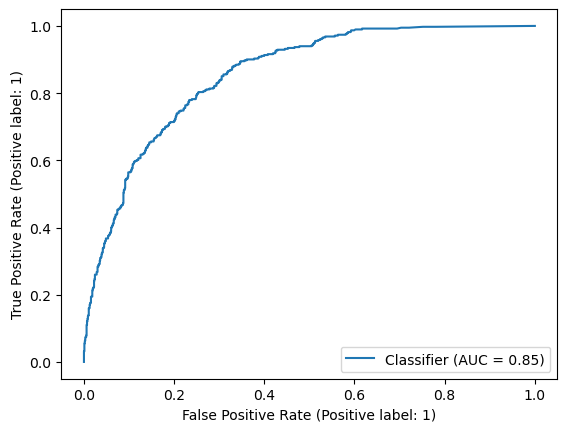

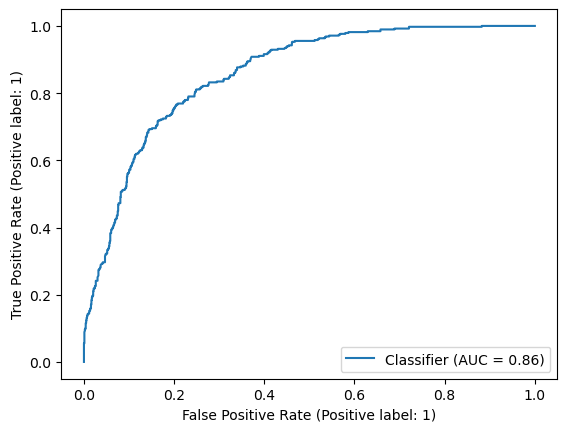

In [15]:
RocCurveDisplay.from_predictions(y['target'], pred1[1:][0])
RocCurveDisplay.from_predictions(y['target'], pred2[1:][0])
plt.show()

In [16]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y['target'], pred1[1:][0])
auc1 = metrics.auc(fpr1, tpr1).round(3)
auc1

0.855

In [17]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y['target'], pred2[1:][0])
auc2 = metrics.auc(fpr2, tpr2).round(3)
auc2

0.858

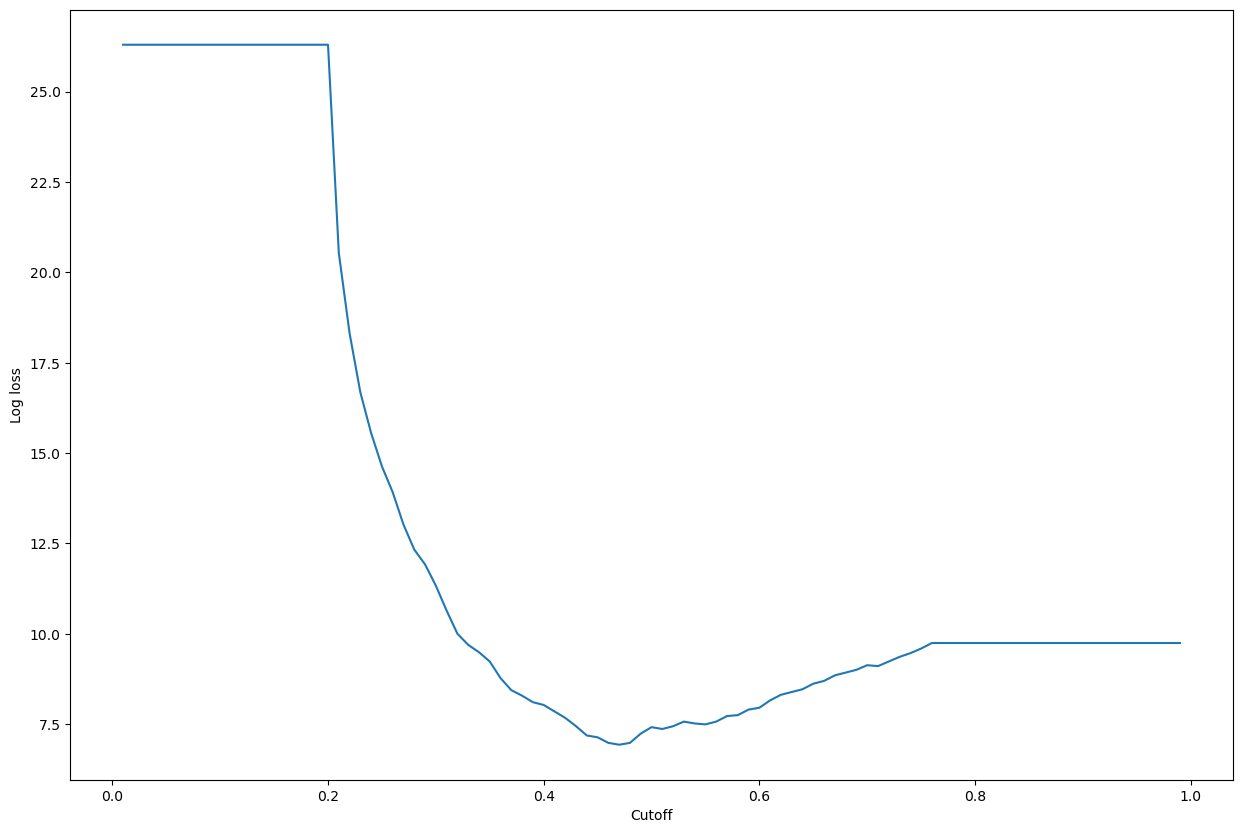

In [18]:
cutoffs = np.arange(0.01, 1, 0.01)
log_loss1 = []
for c in cutoffs:
    log_loss1.append(
        metrics.log_loss(y['target'], np.where(pred1[1:][0] > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss1)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [19]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss1)], 
    ', and the log loss value at the minimum is ', np.min(log_loss1)
)

Log loss is minimized at a cutoff of  0.47000000000000003 , and the log loss value at the minimum is  6.932455690880588


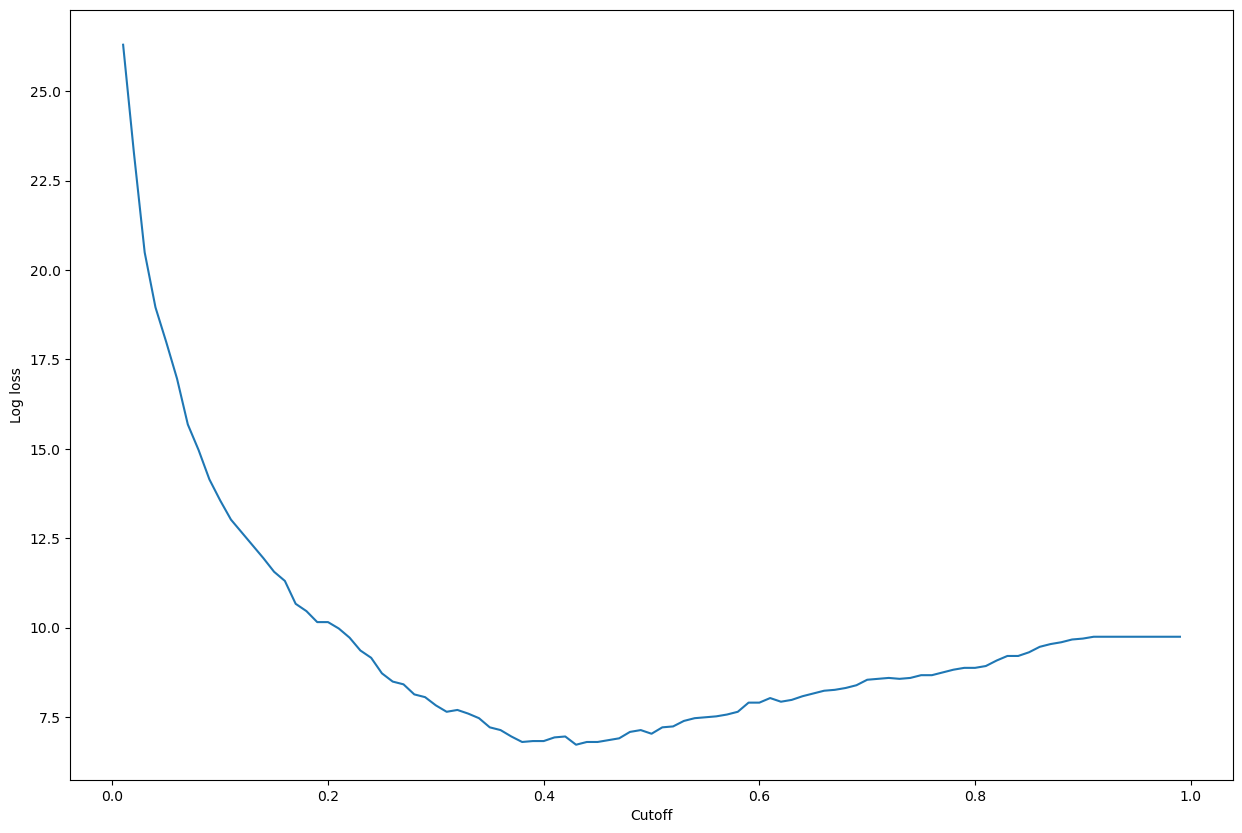

In [20]:
log_loss2 = []
for c in cutoffs:
    log_loss2.append(
        metrics.log_loss(y['target'], np.where(pred2[1:][0] > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss2)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [21]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss2)], 
    ', and the log loss value at the minimum is ', np.min(log_loss2)
)

Log loss is minimized at a cutoff of  0.43 , and the log loss value at the minimum is  6.727807552404409


In [22]:
# Find the index of the optimal threshold for the first set of predictions
optimal_idx1 = np.argmax(tpr1 - fpr1) 
# Get the boundary value (threshold) corresponding to the optimal index
boundary1 = thresholds1[optimal_idx1]
# Convert the predicted probabilities to binary classification based on the optimal threshold
binary_pred1 = [1 if i >= boundary1 else 0 for i in  pred1[1:][0]]
# Find the index of the optimal threshold for the second set of predictions
optimal_idx2 = np.argmax(tpr2 - fpr2) 
# Get the boundary value (threshold) corresponding to the optimal index
boundary2 = thresholds2[optimal_idx2]
# Convert the predicted probabilities to binary classification based on the optimal threshold
binary_pred2 = [1 if i >= boundary2 else 0 for i in  pred2[1:][0]]

In [23]:
print(metrics.classification_report(y['target'], binary_pred1))
print(metrics.classification_report(y['target'], binary_pred2))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1028
           1       0.50      0.88      0.64       381

    accuracy                           0.73      1409
   macro avg       0.72      0.77      0.71      1409
weighted avg       0.82      0.73      0.74      1409

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1028
           1       0.55      0.81      0.65       381

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



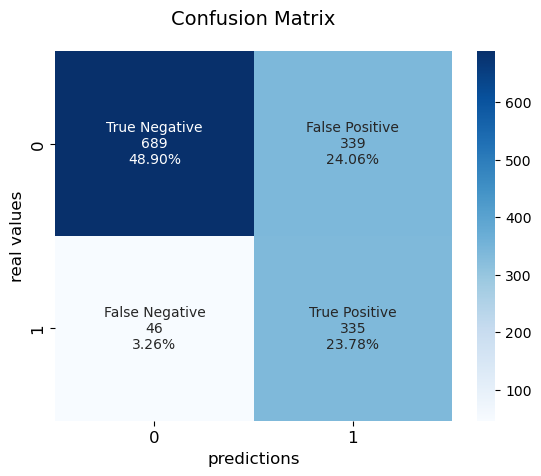

In [25]:
create_confusion_matrix_binary(y_real=y['target'], y_pred=binary_pred1, cat_labels=[0, 1], title="Confusion Matrix", 
                                   cmap="Blues")

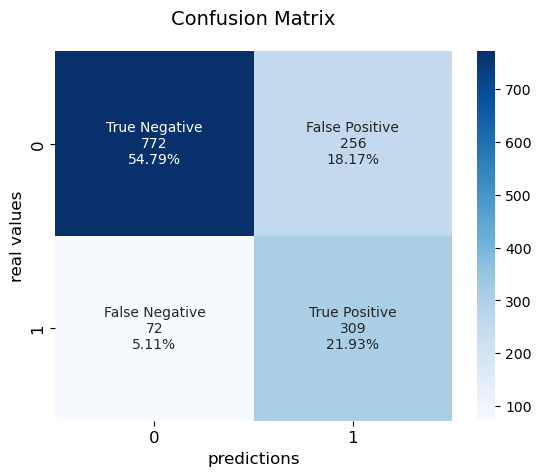

In [26]:
create_confusion_matrix_binary(y_real=y['target'], y_pred=binary_pred2, cat_labels=[0, 1], title="Confusion Matrix", 
                                   cmap="Blues")

With these metric results, where the area under the curve is very similar in both models (around 0.85), the definition of which model to choose will be given by the recall. Although the customer wants to maximize the auc, it is willing to lose some precision if it can maximize recall, since it has low campaign cost compared to customer churn costs.

In [27]:
# Extract recall for class 1
recall_class1_1 = extract_metric(metrics.classification_report(y['target'], binary_pred1), 'recall')
recall_class1_2 = extract_metric(metrics.classification_report(y['target'], binary_pred2), 'recall')

In [28]:
model_metrics = {
    'xgb1': {'auc': auc1, 'recall': recall_class1_1},
    'xgb2': {'auc': auc2, 'recall': recall_class1_2},
}
# choose model according to predefined criteria
chosen_model = choose_model(model_metrics, metric_to_max='auc', min_diff=0.02, max_2nd_metric='recall')
print("Chosen Model:", chosen_model)

Model selected maximizing recall
Chosen Model: xgb1


## <span style="color:lightblue"><a class="anchor" id="Model-Deploy"> Deploy the Model </a></span>

The deploy method creates a deployable model, configures the SageMaker hosting services endpoint, and launches the endpoint to host the model. This endpoint stays active in the ML instance, and you can make instantaneous predictions at any time unless you shut it down later.

In [33]:
from sagemaker.serializers import CSVSerializer
if chosen_model == 'xgb1': 
    xgb_predictor = xgb1.deploy(
        initial_instance_count=1,
        instance_type='ml.t2.medium',
        serializer=CSVSerializer()
    )
else:
    xgb_predictor = xgb2.deploy(
        initial_instance_count=1,
        instance_type='ml.t2.medium',
        serializer=CSVSerializer()
    )

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
---------!

In [ ]:
xgb_predictor_name = xgb_predictor.endpoint_name

In [37]:
xgb_predictor_name = "sagemaker-xgboost-2024-03-26-14-23-40-198"

After you deploy the model to an endpoint, you can set up a new SageMaker predictor by pairing the endpoint and continuously make real-time predictions in any other notebooks. 

In [38]:
xgb_predictor = sagemaker.predictor.Predictor(
    endpoint_name=xgb_predictor_name, # endpoint name
    sagemaker_session=sagemaker.Session(),
    serializer=sagemaker.serializers.CSVSerializer()
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [40]:
# load test features
X_test = pd.read_csv(test_features_path)

In [44]:
# predict on new data
# we use X_test data as an example 
xgb_predictor.predict(X_test)

b'0.4833126962184906,0.3363896310329437,0.24507398903369904,0.33037519454956055,0.20957553386688232,0.5489557385444641,0.47762107849121094,0.21685177087783813,0.20957553386688232,0.35631492733955383,0.40879347920417786,0.277908056974411,0.20957553386688232,0.36212587356567383,0.20957553386688232,0.20957553386688232,0.22774453461170197,0.21610672771930695,0.4544418752193451,0.6452869772911072,0.43239614367485046,0.5774106979370117,0.27032291889190674,0.2491900473833084,0.35490965843200684,0.3013388514518738,0.20957553386688232,0.32289257645606995,0.44373011589050293,0.5298289656639099,0.41550636291503906,0.46963945031166077,0.5126570463180542,0.20957553386688232,0.2979229986667633,0.7317578792572021,0.20957553386688232,0.44093450903892517,0.4751752018928528,0.587135910987854,0.4615669846534729,0.24792835116386414,0.42224904894828796,0.3818652331829071,0.5278106927871704,0.20957553386688232,0.21610672771930695,0.36041250824928284,0.20957553386688232,0.46891456842422485,0.370571106672287,

In [53]:
# make prediction and convert byte string to string and split by comma
prediction = xgb_predictor.predict(X_test).decode('utf-8').split(',')

In [54]:
# Convert string values to float and then to array
array_values = np.array([float(value) for value in prediction])

In [55]:
array_values

array([0.4833127 , 0.33638963, 0.24507399, ..., 0.20957553, 0.21610673,
       0.36335278])

In [56]:
# compute metrics and plot results 
fpr, tpr, thresholds = metrics.roc_curve(y['target'], array_values)
auc = metrics.auc(fpr, tpr).round(3)
auc

0.855

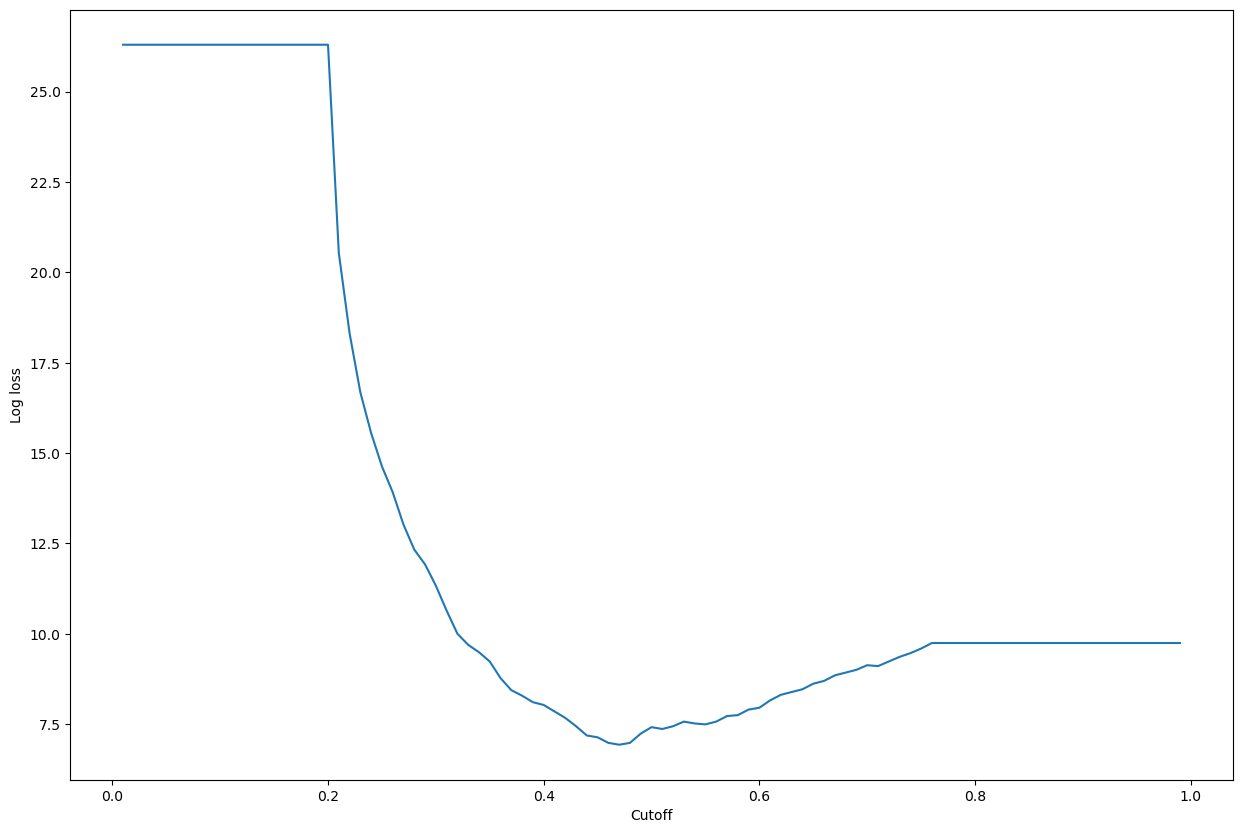

In [57]:
cutoffs = np.arange(0.01, 1, 0.01)
log_loss = []
for c in cutoffs:
    log_loss.append(
        metrics.log_loss(y['target'], np.where(array_values > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [58]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss)], 
    ', and the log loss value at the minimum is ', np.min(log_loss)
)

Log loss is minimized at a cutoff of  0.47000000000000003 , and the log loss value at the minimum is  6.932455690880588


In [59]:
# Find the index of the optimal threshold for the first set of predictions
optimal_idx = np.argmax(tpr - fpr) 
# Get the boundary value (threshold) corresponding to the optimal index
boundary = thresholds[optimal_idx]
# Convert the predicted probabilities to binary classification based on the optimal threshold
binary_pred = [1 if i >= boundary else 0 for i in array_values]

In [60]:
print(metrics.classification_report(y['target'], binary_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1028
           1       0.50      0.88      0.64       381

    accuracy                           0.73      1409
   macro avg       0.72      0.77      0.71      1409
weighted avg       0.82      0.73      0.74      1409



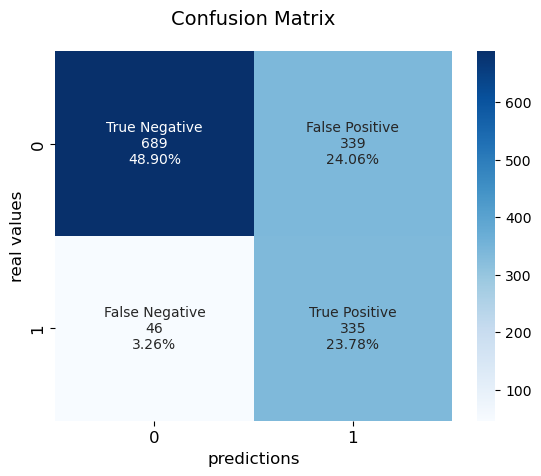

In [61]:
create_confusion_matrix_binary(y_real=y['target'], y_pred=binary_pred, cat_labels=[0, 1], title="Confusion Matrix", 
                                   cmap="Blues")